# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

def schwefel(X):
    return (X*np.sin(np.sqrt(np.abs(X))) ).sum(axis=1) - 418.982887* X.shape[1]


In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

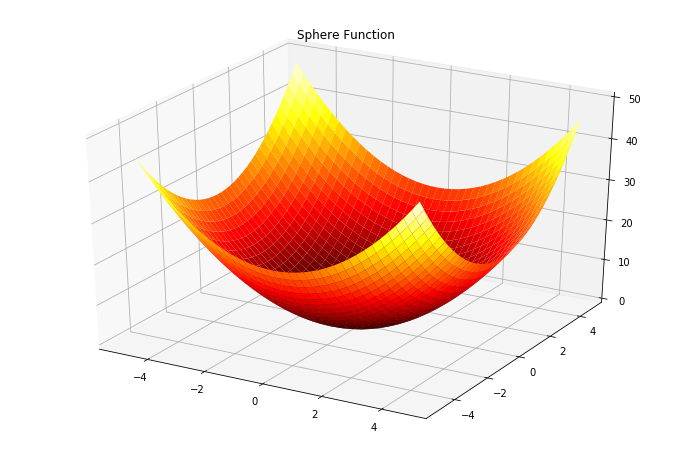

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

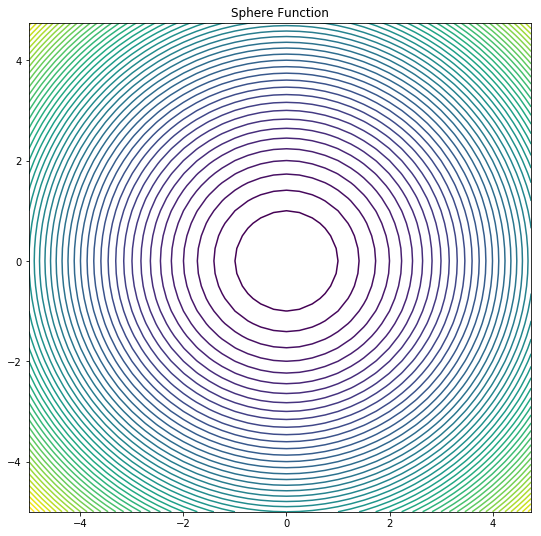

In [334]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

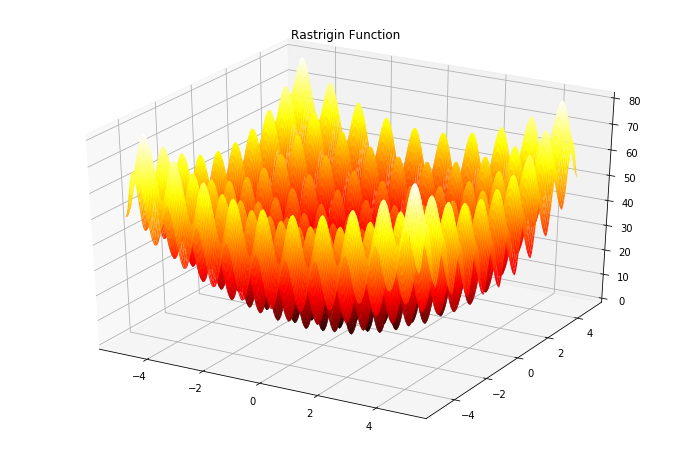

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

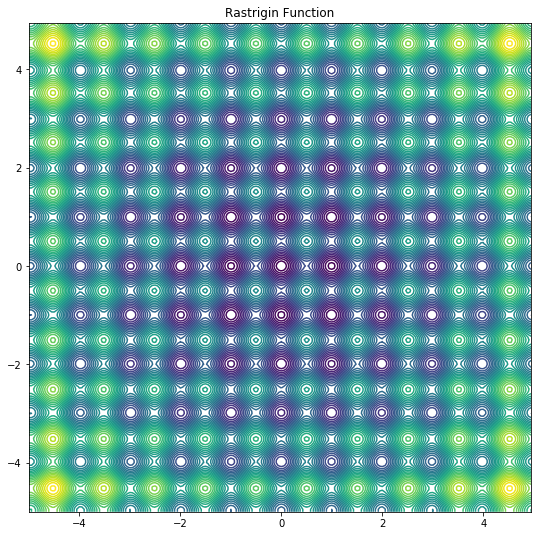

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

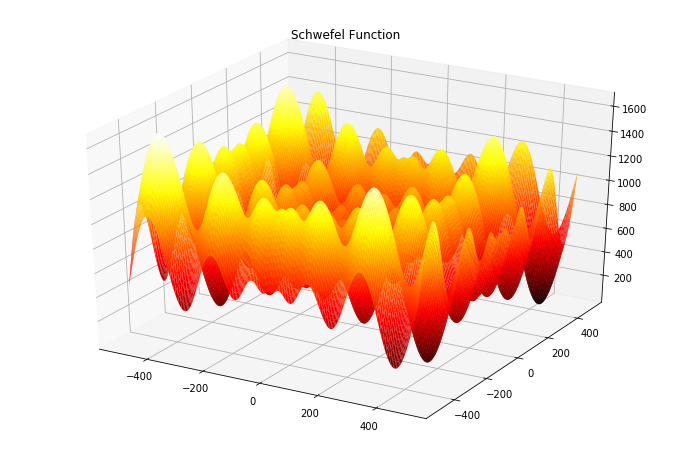

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

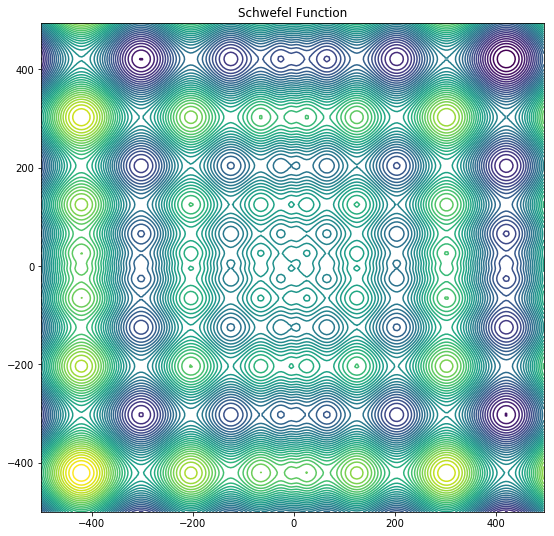

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

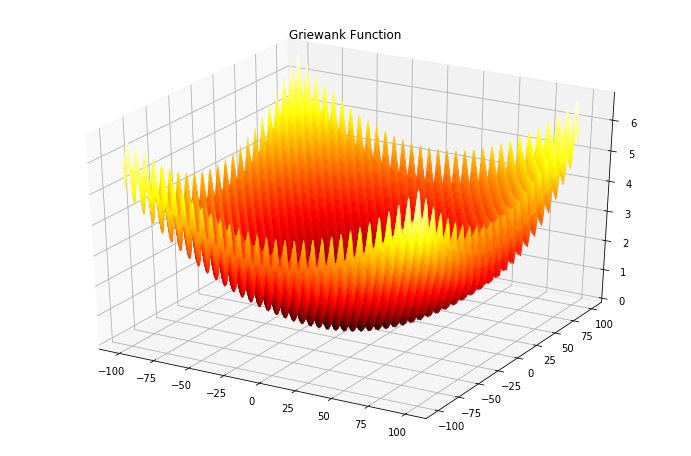

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

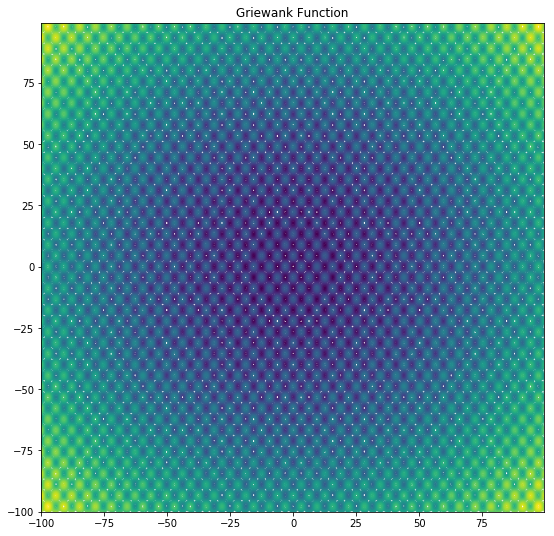

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [8]:
import matplotlib

def better_solutions_factor(original_x, mutated_x, objective_fun):
    original_val = -objective_fun(original_x)
    
    mutated_vals = -objective_fun(mutated_x)
    return (mutated_vals < original_val).sum()/mutated_x.shape[0]

def draw_elipse(mutated, covariance_mat):
    eig_values, eig_vectors = np.linalg.eig(covariance_mat)
    I = np.argsort(eig_values)

    sorted_eig_values = eig_values[I]
    sorted_eig_vectors = eig_vectors[:,I]
    major_len = 2*np.sqrt(5.991*sorted_eig_values[1])
    minor_len = 2*np.sqrt(5.991*sorted_eig_values[0])
    print("major axis length = %f" % major_len)
    print("minor axis length = %f" % minor_len)
    
    major_vector = eig_vectors[:,1]
    
    angle = 0.0
    if major_vector[0] == 0.0:
        angle = 90.0
    else:
        angle = np.arctan(major_vector[1]/major_vector[0])*180/np.pi
        
    e = matplotlib.patches.Ellipse((1, 1), major_len, minor_len, angle)
    plt.gca().add_artist(e)

In [397]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1]*2])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [291]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)


major axis length = 1.223826
minor axis length = 1.223826


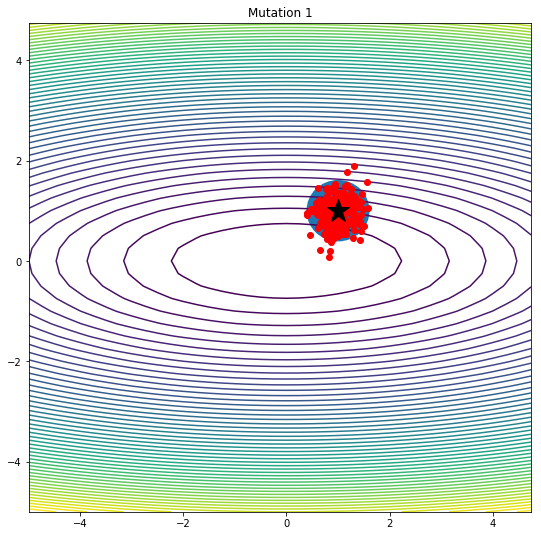

In [292]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])



plt.figure(figsize=(9, 9))
draw_elipse(mutations, np.array([[0.25**2, 0.0], [0.0, 0.25**2]]))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

objective_function_F1
original value = 2.000000
best found in 1000 experiments: 0.160604
46.595200 %


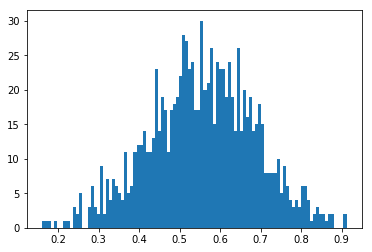

*****************
objective_function_F1a
original value = 10.000000
best found in 1000 experiments: 0.186860
49.523600 %


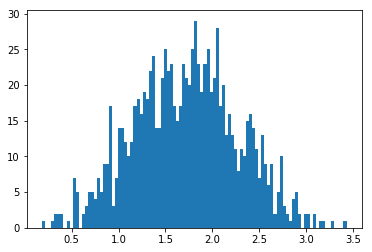

*****************
objective_function_F1b
original value = 626.000000
best found in 1000 experiments: 0.650239
50.046800 %


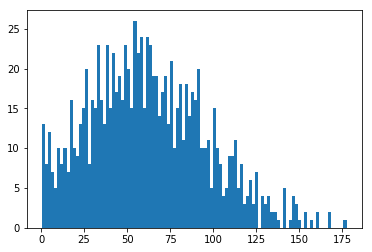

*****************
objective_function_F1c
original value = 1.000000
best found in 1000 experiments: 0.077434
43.327600 %


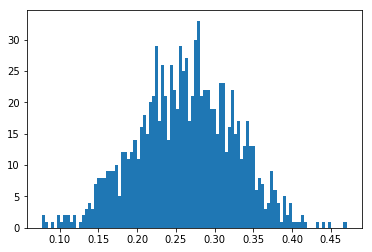

*****************
objective_function_F6
original value = 2.000000
best found in 1000 experiments: 1.255737
0.047600 %


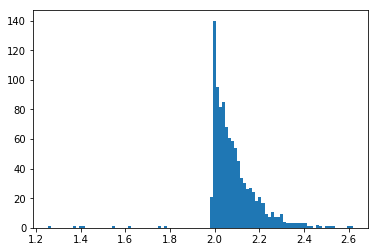

*****************
objective_function_F7
original value = 836.282858
best found in 1000 experiments: 834.524466
50.653200 %


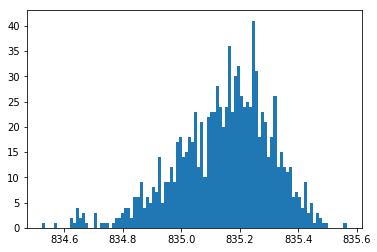

*****************
objective_function_F8
original value = 0.589738
best found in 1000 experiments: 0.013911
46.217600 %


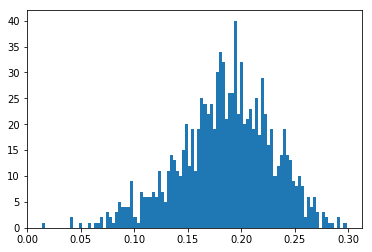

*****************


In [305]:
# Number of better solutions, d=2, original vector = [1,1]

experiment_num = 1000
win_percentage = 0
for objective_function in [objective_function_F1, objective_function_F1a,
                          objective_function_F1b, objective_function_F1c,
                          objective_function_F6, objective_function_F7,
                          objective_function_F8]:
    
    
    best_values = []
    win_percentage = 0
    for _ in range(experiment_num):
        original_individual = np.array([[1, 1]])

        sigma = 0.25
        mutations = original_individual + sigma * np.random.randn(N, d)
        
        best_values.append((-objective_function(mutations)).min())
        win_percentage += 100.0*better_solutions_factor(original_individual, mutations, objective_function)
        
    print(objective_function.__name__)
    print('original value = %f' % -objective_function(original_individual)[0])
    print('best found in 1000 experiments: %f' % min(best_values))
    print("%f %%" % (win_percentage/experiment_num))
    plt.hist(best_values, bins=100)
    plt.show()
    print('*****************')

objective_function_F1
original value = 774.364682
best found in 1000 experiments: 703.647004
46.609600 %


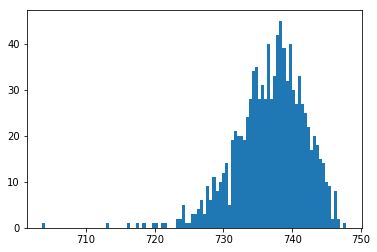

*****************
objective_function_F1a
original value = 887.525639
best found in 1000 experiments: 701.263328
50.099600 %


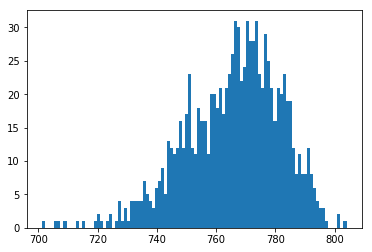

*****************
objective_function_F1b
original value = 3144.589616
best found in 1000 experiments: 881.259216
49.928400 %


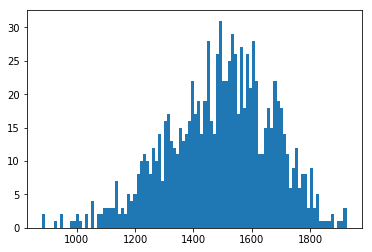

*****************
objective_function_F1c
original value = 57.457903
best found in 1000 experiments: 35.544489
49.865200 %


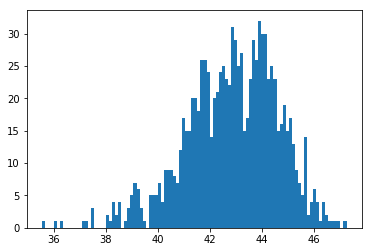

*****************
objective_function_F6
original value = 749.057330
best found in 1000 experiments: 589.314086
61.483600 %


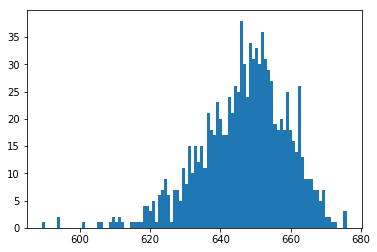

*****************
objective_function_F7
original value = 8330.355797
best found in 1000 experiments: 8326.011527
45.117600 %


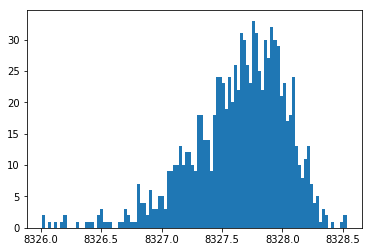

*****************
objective_function_F8
original value = 1.131381
best found in 1000 experiments: 1.119085
47.192000 %


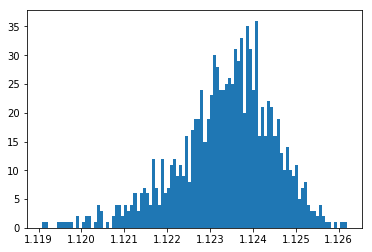

*****************


In [348]:
# Number of better solutions, d = 20, random vector
d = 20
experiment_num = 1000
win_percentage = 0
for objective_function in [objective_function_F1, objective_function_F1a,
                          objective_function_F1b, objective_function_F1c,
                          objective_function_F6, objective_function_F7,
                          objective_function_F8]:
    
    
    best_values = []
    win_percentage = 0
    original_individual = np.random.uniform(0,10,(1,d))
    for _ in range(experiment_num):
        sigma = 0.25
        mutations = original_individual + sigma * np.random.randn(N, d)
        
        best_values.append((-objective_function(mutations)).min())
        win_percentage += 100.0*better_solutions_factor(original_individual, mutations, objective_function)
        
    print(objective_function.__name__)
    print('original value = %f' % -objective_function(original_individual)[0])
    print('best found in 1000 experiments: %f' % min(best_values))
    print("%f %%" % (win_percentage/experiment_num))
    plt.hist(best_values, bins=100)
    plt.show()
    print('*****************')

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [307]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

major axis length = 2.447652
minor axis length = 1.223826


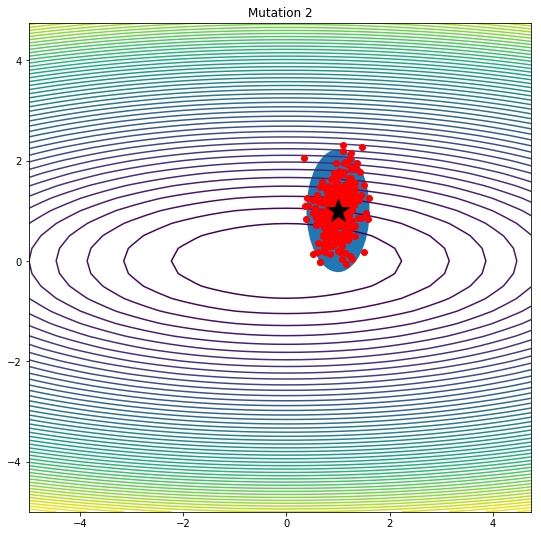

In [311]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
draw_elipse(mutations, np.array([[0.25**2, 0.0], [0.0, 0.5**2]]))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

objective_function_F1
original value = 2.000000
best found in 1000 experiments: 0.013274
46.028400 %


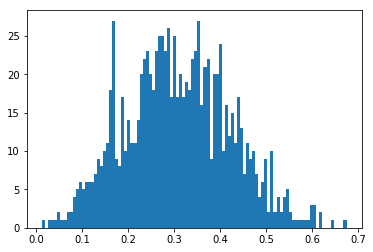

*****************
objective_function_F1a
original value = 10.000000
best found in 1000 experiments: 0.001793
49.820800 %


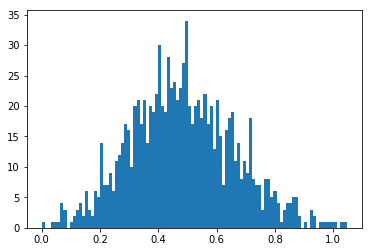

*****************
objective_function_F1b
original value = 626.000000
best found in 1000 experiments: 0.064718
49.983200 %


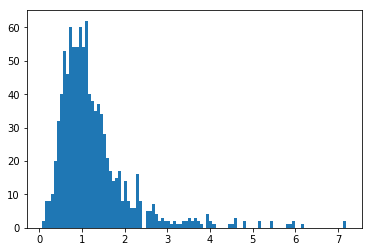

*****************
objective_function_F1c
original value = 1.000000
best found in 1000 experiments: 0.003908
42.138800 %


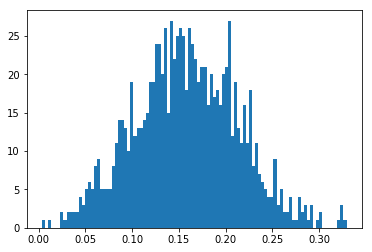

*****************
objective_function_F6
original value = 2.000000
best found in 1000 experiments: 0.997214
0.304800 %


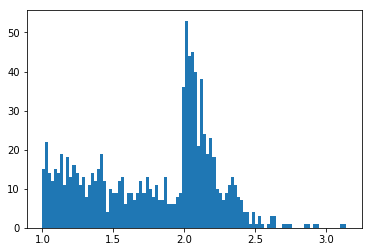

*****************
objective_function_F7
original value = 836.282858
best found in 1000 experiments: 833.570179
50.560000 %


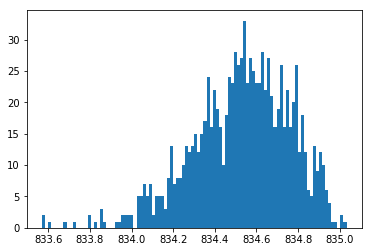

*****************
objective_function_F8
original value = 0.589738
best found in 1000 experiments: 0.003688
42.253200 %


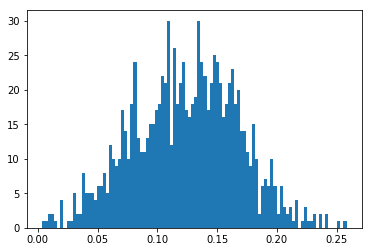

*****************


In [312]:
# Number of better solutions

experiment_num = 1000
win_percentage = 0
for objective_function in [objective_function_F1, objective_function_F1a,
                          objective_function_F1b, objective_function_F1c,
                          objective_function_F6, objective_function_F7,
                          objective_function_F8]:
    
    
    best_values = []
    win_percentage = 0
    for _ in range(experiment_num):
        original_individual = np.array([[1, 1]])

        sigma = np.array([0.25, 0.5])
        mutations = original_individual + sigma * np.random.randn(N, d)
        
        best_values.append((-objective_function(mutations)).min())
        win_percentage += 100.0*better_solutions_factor(original_individual, mutations, objective_function)
        
    print(objective_function.__name__)
    print('original value = %f' % -objective_function(original_individual)[0])
    print('best found in 1000 experiments: %f' % min(best_values))
    print("%f %%" % (win_percentage/experiment_num))
    plt.hist(best_values, bins=100)
    plt.show()
    print('*****************')

objective_function_F1
original value = 673.767963
best found in 1000 experiments: 590.366208
44.530000 %


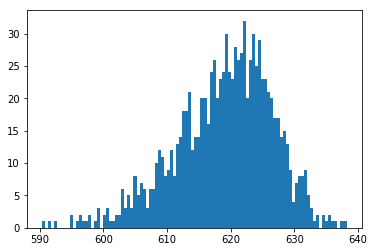

*****************
objective_function_F1a
original value = 620.463758
best found in 1000 experiments: 324.276929
49.967200 %


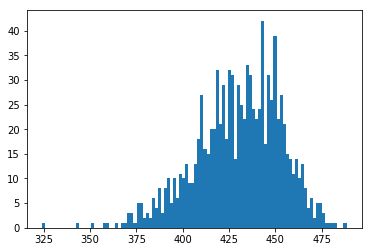

*****************
objective_function_F1b
original value = 32856.593487
best found in 1000 experiments: 14528.824704
49.980800 %


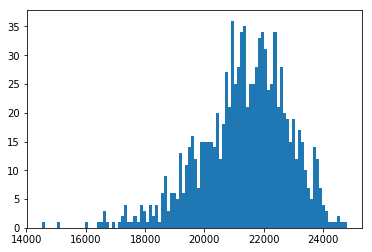

*****************
objective_function_F1c
original value = 20.368375
best found in 1000 experiments: 1.424913
49.937200 %


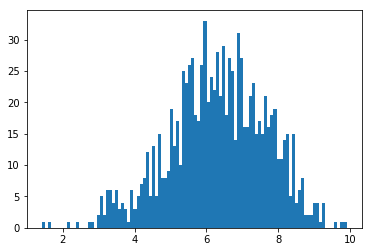

*****************
objective_function_F6
original value = 700.832312
best found in 1000 experiments: 581.955373
19.341600 %


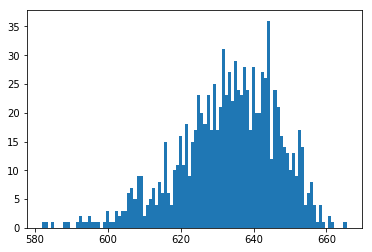

*****************
objective_function_F7
original value = 8330.593873
best found in 1000 experiments: 8324.745227
45.861600 %


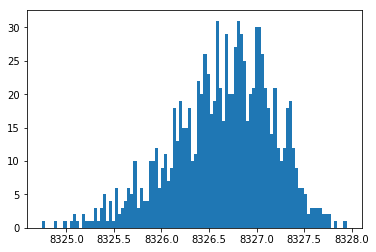

*****************
objective_function_F8
original value = 1.122025
best found in 1000 experiments: 1.104991
42.216800 %


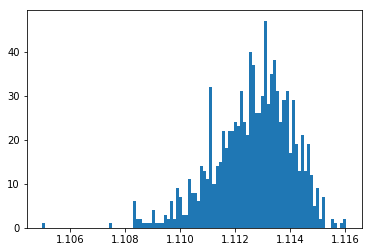

*****************


In [350]:
# Number of better solutions, d = 20, random vector
d = 20
experiment_num = 1000
win_percentage = 0
for objective_function in [objective_function_F1, objective_function_F1a,
                          objective_function_F1b, objective_function_F1c,
                          objective_function_F6, objective_function_F7,
                          objective_function_F8]:
    
    
    best_values = []
    win_percentage = 0
    original_individual = np.random.uniform(0,10,(1,d))
    for _ in range(experiment_num):
        sigma = np.array([0.25, 0.5]*10)
        mutations = original_individual + sigma * np.random.randn(N, d)
        
        best_values.append((-objective_function(mutations)).min())
        win_percentage += 100.0*better_solutions_factor(original_individual, mutations, objective_function)
        
    print(objective_function.__name__)
    print('original value = %f' % -objective_function(original_individual)[0])
    print('best found in 1000 experiments: %f' % min(best_values))
    print("%f %%" % (win_percentage/experiment_num))
    plt.hist(best_values, bins=100)
    plt.show()
    print('*****************')

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [ ]:
S = np.array([[0.25, 0.25],[0.25, 0.50]])

mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

major axis length = 3.960384
minor axis length = 1.512732


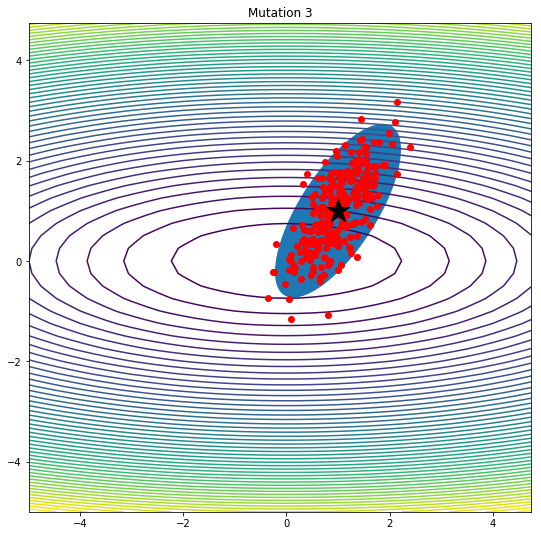

In [406]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
draw_elipse(mutations, np.array([[0.25, 0.25],[0.25, 0.5]]))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

objective_function_F1
original value = 2.000000
best found in 1000 experiments: 0.000002
48.004400 %


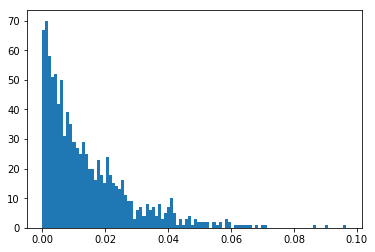

*****************
objective_function_F1a
original value = 10.000000
best found in 1000 experiments: 0.000011
49.436000 %


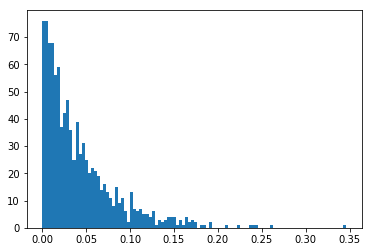

*****************
objective_function_F1b
original value = 626.000000
best found in 1000 experiments: 0.000365
49.931600 %


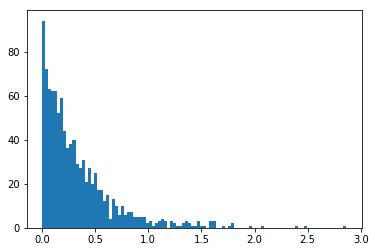

*****************
objective_function_F1c
original value = 1.000000
best found in 1000 experiments: 0.000004
42.926000 %


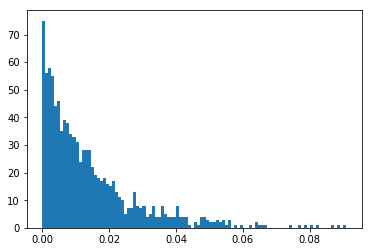

*****************
objective_function_F6
original value = 2.000000
best found in 1000 experiments: 0.003492
0.489600 %


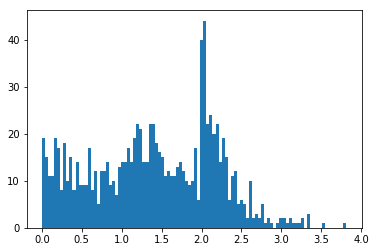

*****************
objective_function_F7
original value = 836.282858
best found in 1000 experiments: 831.238034
50.300000 %


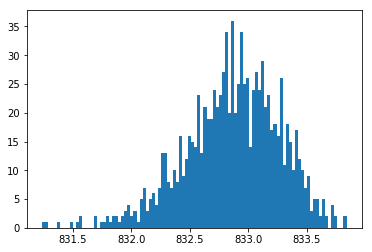

*****************
objective_function_F8
original value = 0.589738
best found in 1000 experiments: 0.000004
47.263600 %


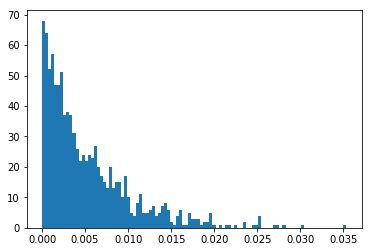

*****************


In [313]:
# Number of better solutions

experiment_num = 1000
win_percentage = 0
for objective_function in [objective_function_F1, objective_function_F1a,
                          objective_function_F1b, objective_function_F1c,
                          objective_function_F6, objective_function_F7,
                          objective_function_F8]:
    
    
    best_values = []
    win_percentage = 0
    for _ in range(experiment_num):
        original_individual = np.array([[1, 1]])

        S = np.array([[0.25, 0.25],[0.25, 0.5]])
        mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
        
        best_values.append((-objective_function(mutations)).min())
        win_percentage += 100.0*better_solutions_factor(original_individual, mutations, objective_function)
        
    print(objective_function.__name__)
    print('original value = %f' % -objective_function(original_individual)[0])
    print('best found in 1000 experiments: %f' % min(best_values))
    print("%f %%" % (win_percentage/experiment_num))
    plt.hist(best_values, bins=100)
    plt.show()
    print('*****************')

objective_function_F1
original value = 558.369328
best found in 1000 experiments: 269.056140
47.836800 %


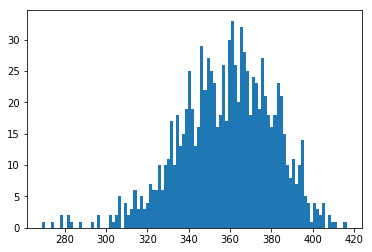

*****************
objective_function_F1a
original value = 627.206393
best found in 1000 experiments: 226.026603
49.904000 %


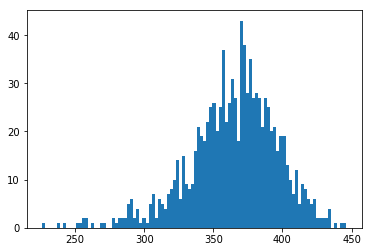

*****************
objective_function_F1b
original value = 9490.363946
best found in 1000 experiments: 409.004237
49.970800 %


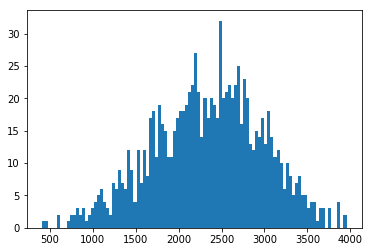

*****************
objective_function_F1c
original value = 71.406625
best found in 1000 experiments: 31.864560
48.430400 %


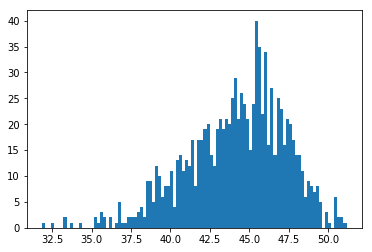

*****************
objective_function_F6
original value = 938.570788
best found in 1000 experiments: 448.467846
67.585200 %


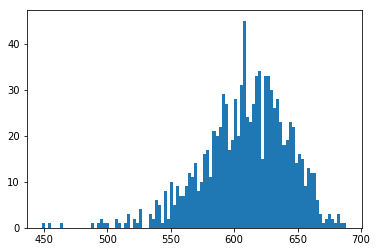

*****************
objective_function_F7
original value = 8317.916506
best found in 1000 experiments: 8312.598969
22.111600 %


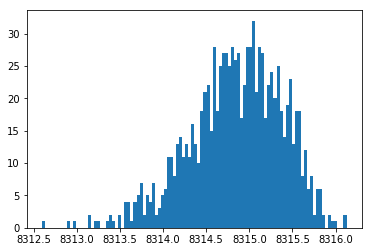

*****************
objective_function_F8
original value = 1.138795
best found in 1000 experiments: 1.062104
47.870400 %


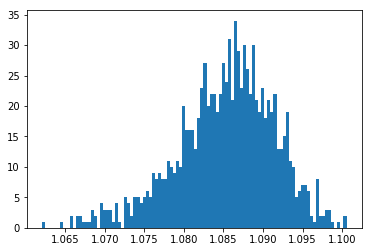

*****************


In [352]:
# Number of better solutions, d = 20, random vector
d = 20
experiment_num = 1000
win_percentage = 0
for objective_function in [objective_function_F1, objective_function_F1a,
                          objective_function_F1b, objective_function_F1c,
                          objective_function_F6, objective_function_F7,
                          objective_function_F8]:
    
    
    best_values = []
    win_percentage = 0
    original_individual = np.random.uniform(0,10,(1,d))
    for _ in range(experiment_num):
        S = np.ones((d,d)) * 0.25#np.array([[0.25, 0.25],[0.25, 0.5]])
        S[np.arange(d), np.arange(d)] = 0.5
        mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
        
        best_values.append((-objective_function(mutations)).min())
        win_percentage += 100.0*better_solutions_factor(original_individual, mutations, objective_function)
        
    print(objective_function.__name__)
    print('original value = %f' % -objective_function(original_individual)[0])
    print('best found in 1000 experiments: %f' % min(best_values))
    print("%f %%" % (win_percentage/experiment_num))
    plt.hist(best_values, bins=100)
    plt.show()
    print('*****************')

## Przykładowa strategia ewolucyjna

In [9]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1
      ,min_domain=-100, max_domain=100):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    #current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_solutions = np.random.uniform(min_domain, max_domain, size=(population_size, chromosome_length))
    
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))
    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):
        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)
        
        
        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        
        # clip to domains
        children_population_solutions[children_population_solutions < min_domain] = min_domain
        children_population_solutions[children_population_solutions > max_domain] = max_domain
        
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -4065.44392891, mean score = -20740.63452471.
Iteration 0020 : best score = -0.00776334, mean score = -0.06520606.
Iteration 0040 : best score = -0.00000002, mean score = -0.00000017.


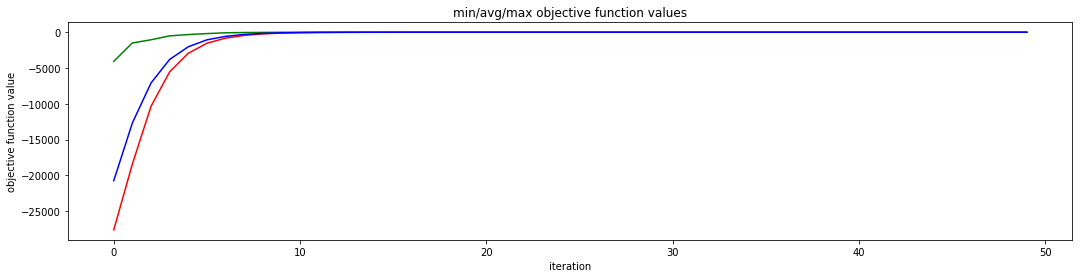

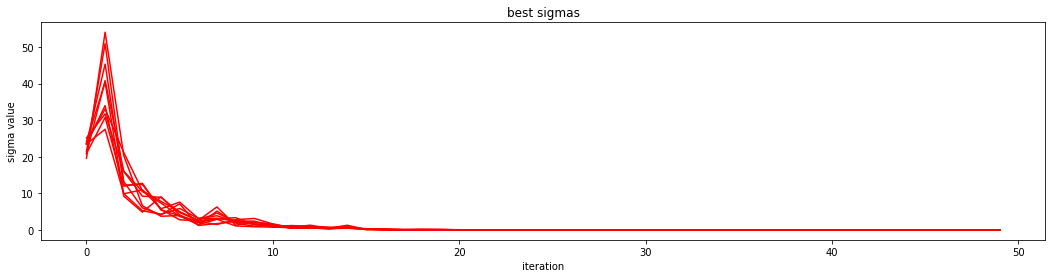

Iteration 0000 : best score = -14584.43788537, mean score = -47256.64410633.
Iteration 0020 : best score = -0.29971120, mean score = -0.87282916.
Iteration 0040 : best score = -0.00006122, mean score = -0.00016153.
Iteration 0060 : best score = -0.00000002, mean score = -0.00000006.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0140 : best score = -0.00000000, mean score = -0.00000000.


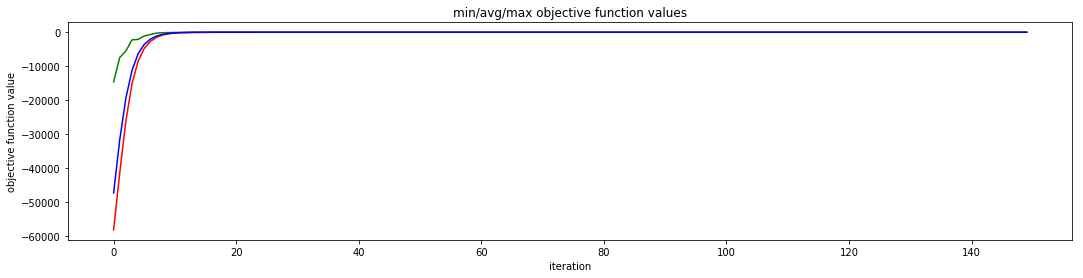

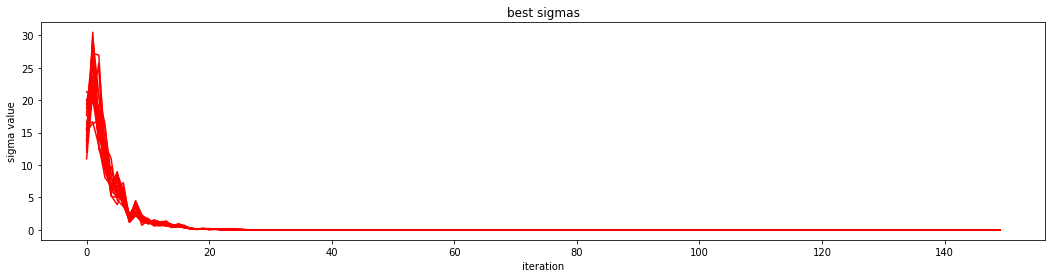

Iteration 0000 : best score = -63345.81268642, mean score = -132657.54996811.
Iteration 0020 : best score = -15.05384504, mean score = -24.29572130.
Iteration 0040 : best score = -0.45879391, mean score = -0.65696170.
Iteration 0060 : best score = -0.01869294, mean score = -0.02824988.
Iteration 0080 : best score = -0.00085607, mean score = -0.00115543.
Iteration 0100 : best score = -0.00003717, mean score = -0.00005267.
Iteration 0120 : best score = -0.00000206, mean score = -0.00000290.
Iteration 0140 : best score = -0.00000012, mean score = -0.00000017.
Iteration 0160 : best score = -0.00000001, mean score = -0.00000001.
Iteration 0180 : best score = -0.00000000, mean score = -0.00000000.


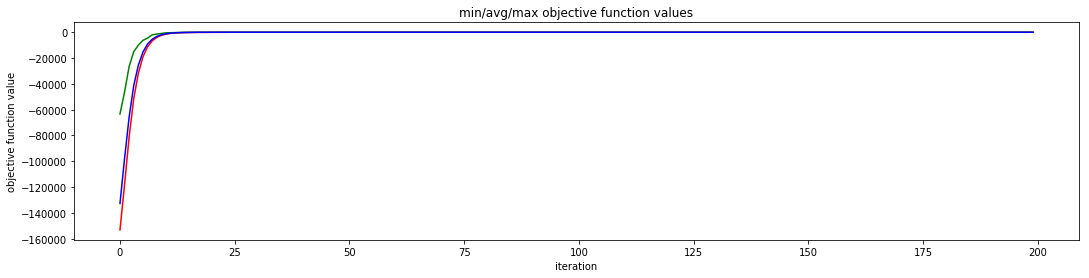

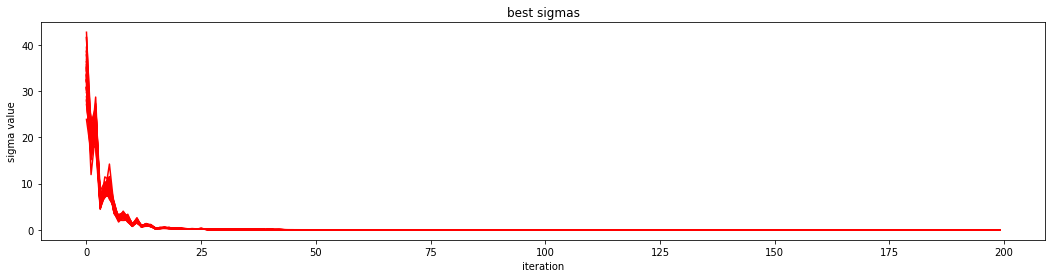

Iteration 0000 : best score = -172155.66619573, mean score = -280320.84111986.
Iteration 0020 : best score = -116.11619867, mean score = -153.36674089.
Iteration 0040 : best score = -17.28213901, mean score = -20.54376110.
Iteration 0060 : best score = -3.92594215, mean score = -4.69217208.
Iteration 0080 : best score = -0.84991996, mean score = -0.98965853.
Iteration 0100 : best score = -0.18806673, mean score = -0.21976366.
Iteration 0120 : best score = -0.04127586, mean score = -0.05025287.
Iteration 0140 : best score = -0.01012072, mean score = -0.01169594.
Iteration 0160 : best score = -0.00238687, mean score = -0.00285521.
Iteration 0180 : best score = -0.00062760, mean score = -0.00074282.
Iteration 0200 : best score = -0.00015870, mean score = -0.00018838.
Iteration 0220 : best score = -0.00004193, mean score = -0.00004759.
Iteration 0240 : best score = -0.00000947, mean score = -0.00001151.
Iteration 0260 : best score = -0.00000233, mean score = -0.00000281.
Iteration 0280 : b

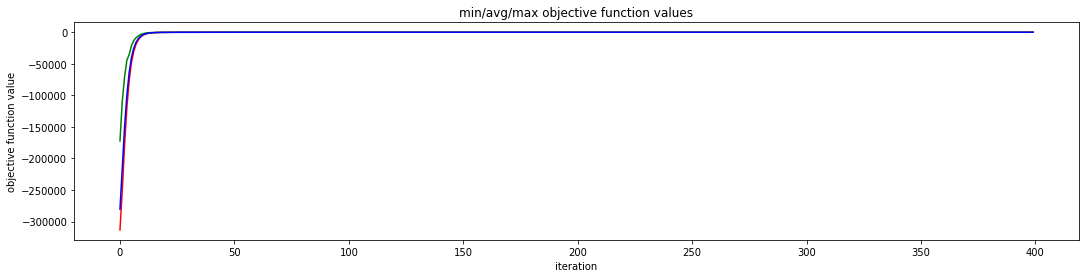

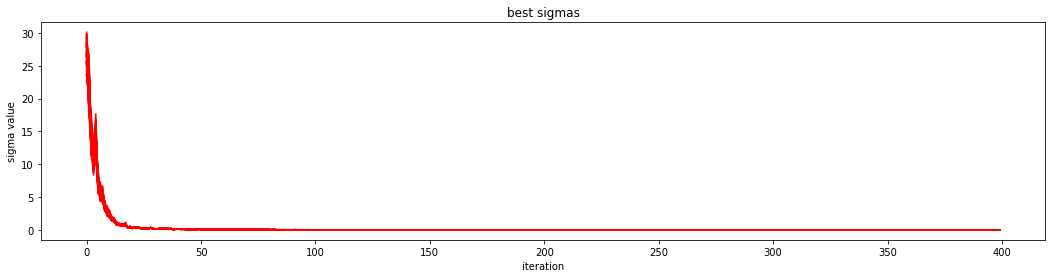

In [55]:
#(dim, ppl_size, iter, )
parameters = [
    (10, 2000, 50),
    (20, 2000, 150),
    (50, 2000, 200),
    (100, 3000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
        sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-100, 
        max_domain=100)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

(10, 2000, 50)
Iteration 0000 : best score = -60.59491687, mean score = -125.26489993.
Iteration 0020 : best score = -20.75168256, mean score = -55.22221899.
Iteration 0040 : best score = -0.00038056, mean score = -0.00281077.


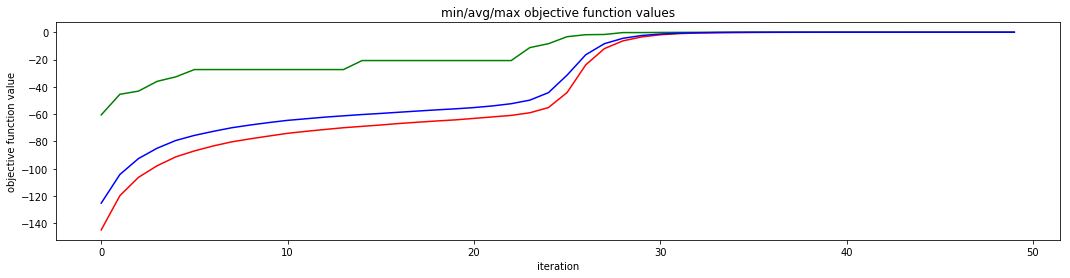

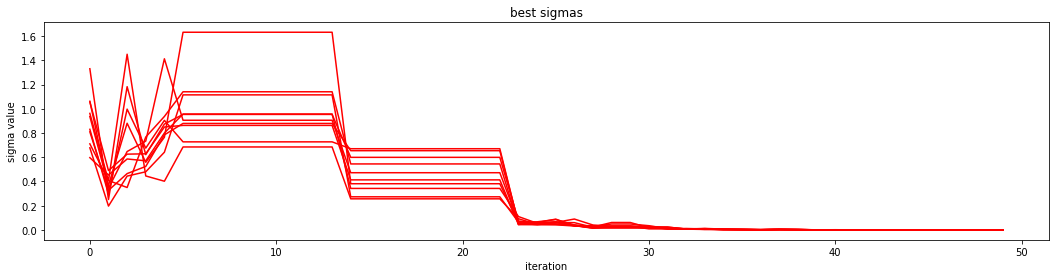

(20, 2000, 150)
Iteration 0000 : best score = -172.23458097, mean score = -267.64146434.
Iteration 0020 : best score = -73.87094565, mean score = -139.07562351.
Iteration 0040 : best score = -0.02909242, mean score = -0.08090651.
Iteration 0060 : best score = -0.00000743, mean score = -0.00002290.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0140 : best score = 0.00000000, mean score = 0.00000000.


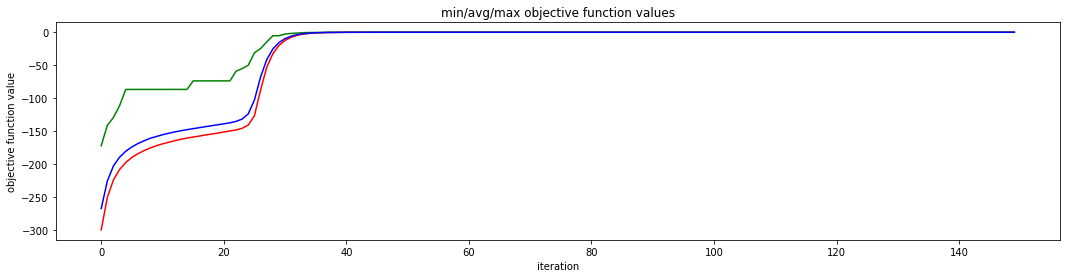

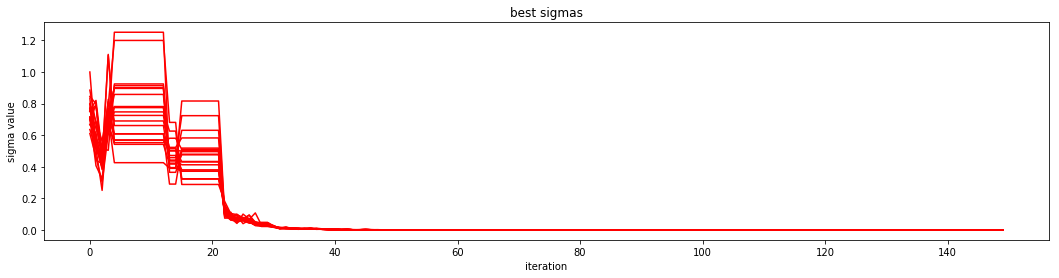

(50, 2000, 200)
Iteration 0000 : best score = -527.03742953, mean score = -701.14793824.
Iteration 0020 : best score = -192.36398314, mean score = -368.79709042.
Iteration 0040 : best score = -2.28157817, mean score = -3.62420740.
Iteration 0060 : best score = -0.06576276, mean score = -0.11934753.
Iteration 0080 : best score = -0.00323786, mean score = -0.00467660.
Iteration 0100 : best score = -0.00016911, mean score = -0.00022821.
Iteration 0120 : best score = -0.00000823, mean score = -0.00001347.
Iteration 0140 : best score = -0.00000053, mean score = -0.00000079.
Iteration 0160 : best score = -0.00000003, mean score = -0.00000005.
Iteration 0180 : best score = -0.00000000, mean score = -0.00000000.


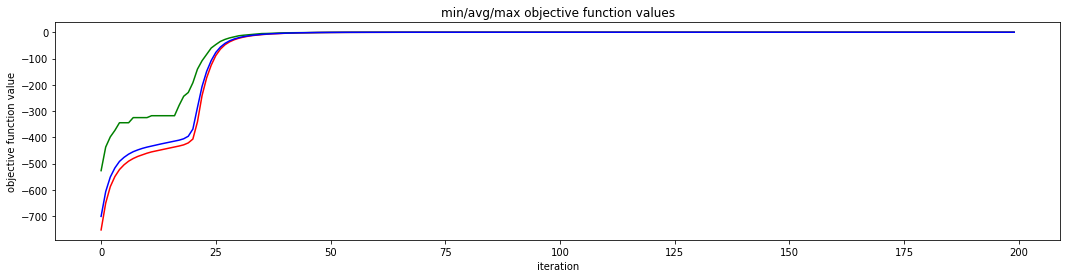

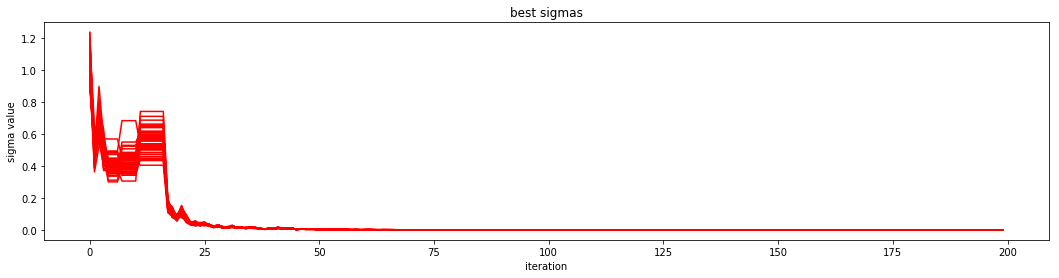

(100, 3000, 400)
Iteration 0000 : best score = -1192.40984060, mean score = -1431.22221198.
Iteration 0020 : best score = -412.61538011, mean score = -663.96659632.
Iteration 0040 : best score = -28.94992944, mean score = -34.08159863.
Iteration 0060 : best score = -6.41075599, mean score = -7.62636255.
Iteration 0080 : best score = -1.36784436, mean score = -1.68751688.
Iteration 0100 : best score = -0.29182808, mean score = -0.35061646.
Iteration 0120 : best score = -0.06549778, mean score = -0.07997039.
Iteration 0140 : best score = -0.01608174, mean score = -0.01920705.
Iteration 0160 : best score = -0.00399166, mean score = -0.00466164.
Iteration 0180 : best score = -0.00085150, mean score = -0.00104175.
Iteration 0200 : best score = -0.00018849, mean score = -0.00022757.
Iteration 0220 : best score = -0.00003936, mean score = -0.00004950.
Iteration 0240 : best score = -0.00001005, mean score = -0.00001183.
Iteration 0260 : best score = -0.00000242, mean score = -0.00000281.
Itera

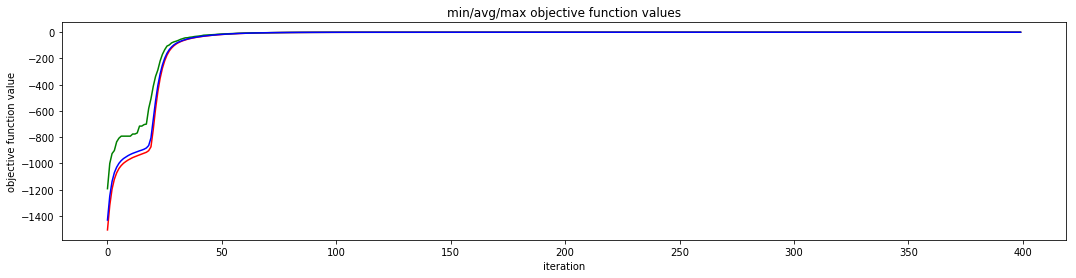

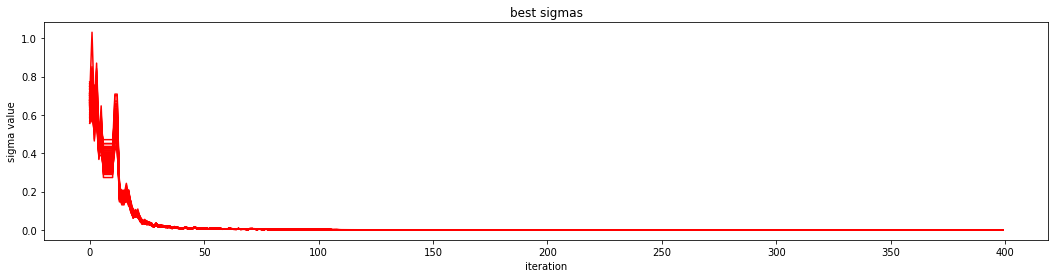

In [61]:
#(dim, ppl_size, iter, )
parameters = [
    (10, 2000, 50),
    (20, 2000, 150),
    (50, 2000, 200),
    (100, 3000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
        sigma=1.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-5.12, 
        max_domain=5.12)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

(10, 2000, 50)
Iteration 0000 : best score = -63.04849846, mean score = -128.15483563.
Iteration 0020 : best score = -0.00697525, mean score = -0.04816219.
Iteration 0040 : best score = -0.00000026, mean score = -0.00000087.


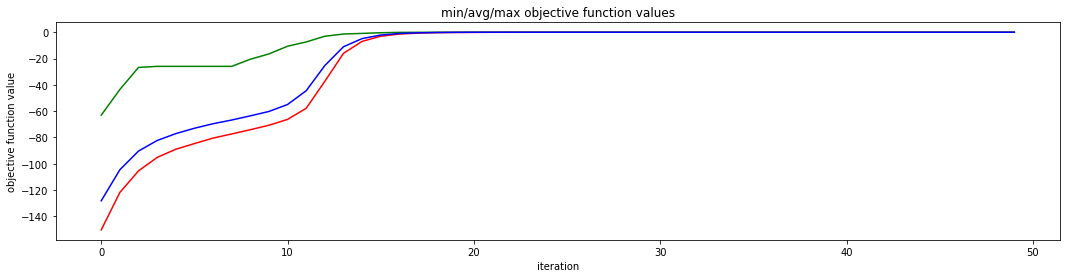

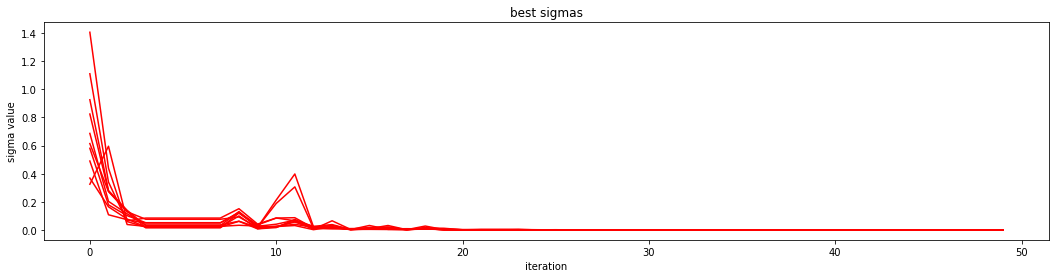

(20, 2000, 150)
Iteration 0000 : best score = -160.23405294, mean score = -270.90450586.
Iteration 0020 : best score = -0.30054442, mean score = -0.96863112.
Iteration 0040 : best score = -0.00116482, mean score = -0.00264517.
Iteration 0060 : best score = -0.00001009, mean score = -0.00002475.
Iteration 0080 : best score = -0.00000004, mean score = -0.00000011.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0140 : best score = 0.00000000, mean score = -0.00000000.


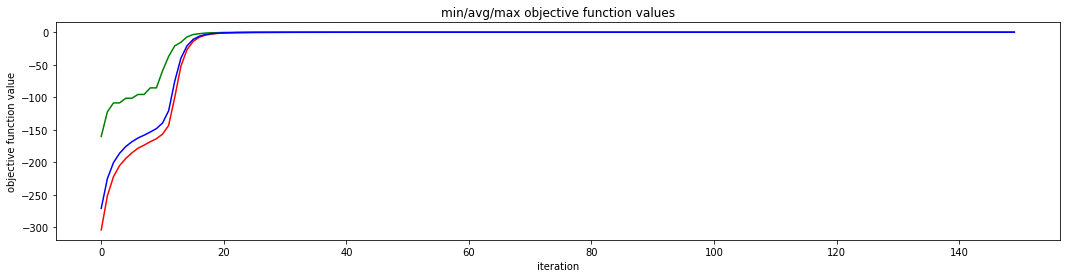

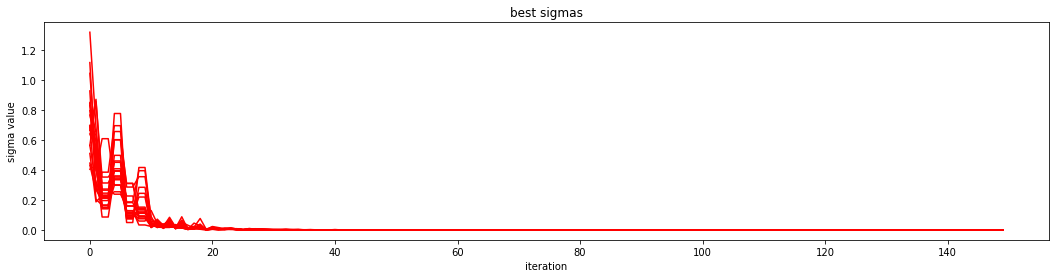

(50, 2000, 200)
Iteration 0000 : best score = -518.77520725, mean score = -704.78173318.
Iteration 0020 : best score = -14.83301423, mean score = -21.63955440.
Iteration 0040 : best score = -1.13120185, mean score = -1.59759307.
Iteration 0060 : best score = -0.13866087, mean score = -0.18622051.
Iteration 0080 : best score = -0.01915163, mean score = -0.02534220.
Iteration 0100 : best score = -0.00264352, mean score = -0.00345281.
Iteration 0120 : best score = -0.00036847, mean score = -0.00046629.
Iteration 0140 : best score = -0.00005197, mean score = -0.00006495.
Iteration 0160 : best score = -0.00000833, mean score = -0.00001101.
Iteration 0180 : best score = -0.00000065, mean score = -0.00000098.


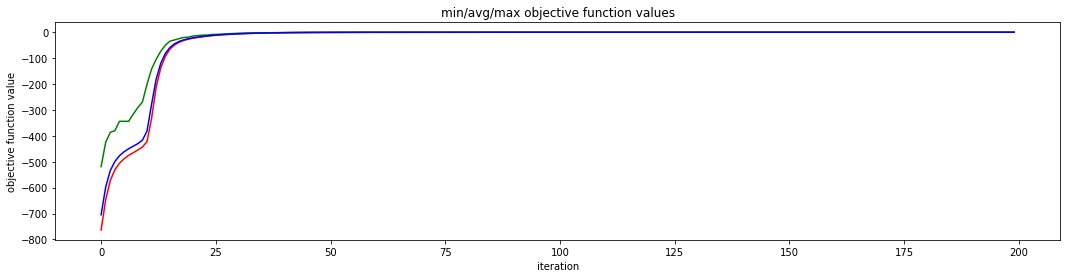

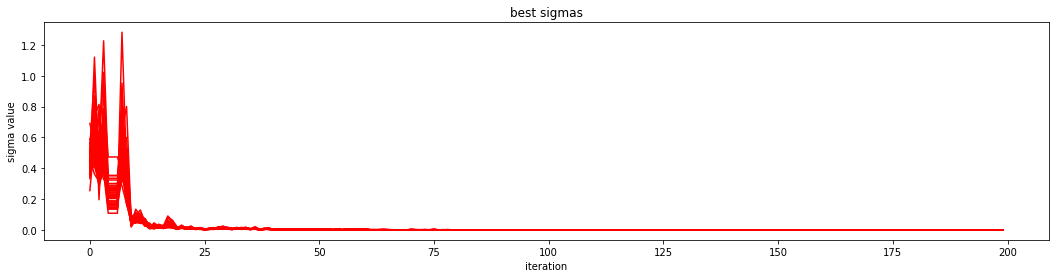

(100, 3000, 400)
Iteration 0000 : best score = -1171.08493478, mean score = -1432.94276907.
Iteration 0020 : best score = -50.32518836, mean score = -59.62839528.
Iteration 0040 : best score = -15.46674474, mean score = -17.81047400.
Iteration 0060 : best score = -4.67720640, mean score = -5.38022147.
Iteration 0080 : best score = -1.40495725, mean score = -1.62494032.
Iteration 0100 : best score = -0.42050930, mean score = -0.49865432.
Iteration 0120 : best score = -0.13770471, mean score = -0.15858376.
Iteration 0140 : best score = -0.04783609, mean score = -0.05527315.
Iteration 0160 : best score = -0.01617432, mean score = -0.01846471.
Iteration 0180 : best score = -0.00584665, mean score = -0.00660915.
Iteration 0200 : best score = -0.00243506, mean score = -0.00270382.
Iteration 0220 : best score = -0.00101535, mean score = -0.00115882.
Iteration 0240 : best score = -0.00034875, mean score = -0.00039859.
Iteration 0260 : best score = -0.00010800, mean score = -0.00012378.
Iterati

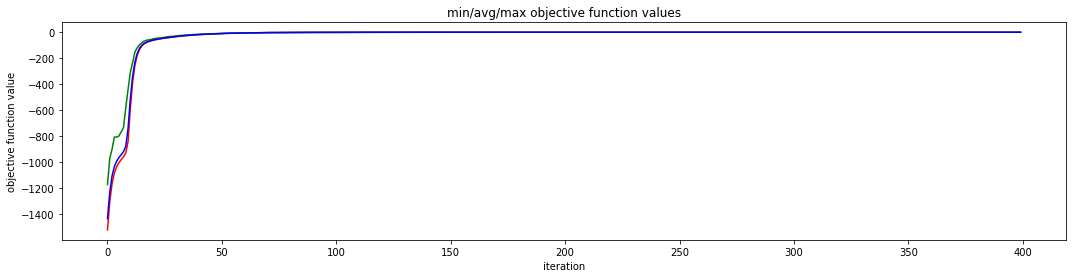

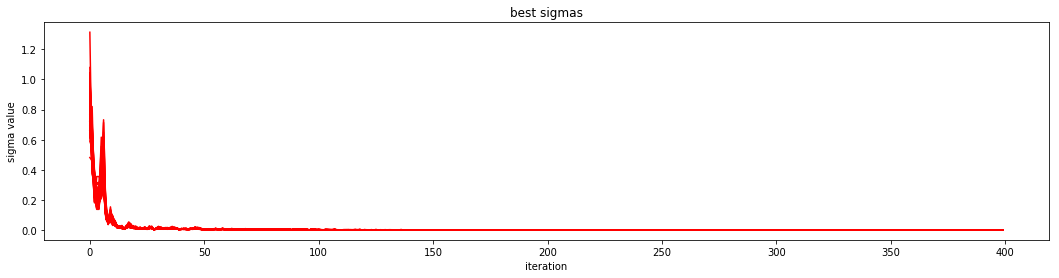

In [80]:
#(dim, ppl_size, iter, ) Rastrigin, bigger tau
parameters = [
    (10, 2000, 50),
    (20, 2000, 150),
    (50, 2000, 200),
    (100, 3000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
        sigma=1.0, tau=2/np.sqrt(2*d), tau_0=2/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-5.12, 
        max_domain=5.12)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

(30, 2000, 400)
Iteration 0000 : best score = -347.66533501, mean score = -491.07370073.
Iteration 0020 : best score = -147.33402274, mean score = -174.65676313.
Iteration 0040 : best score = -95.83024712, mean score = -99.99466890.
Iteration 0060 : best score = -90.82555514, mean score = -91.09348798.
Iteration 0080 : best score = -90.09403728, mean score = -90.17143485.
Iteration 0100 : best score = -89.83643785, mean score = -89.85388235.
Iteration 0120 : best score = -89.80223386, mean score = -89.80544593.
Iteration 0140 : best score = -89.60489099, mean score = -89.67551218.
Iteration 0160 : best score = -89.55231514, mean score = -89.55421272.
Iteration 0180 : best score = -89.54792531, mean score = -89.54832669.
Iteration 0200 : best score = -89.54677170, mean score = -89.54687818.
Iteration 0220 : best score = -89.54643122, mean score = -89.54645259.
Iteration 0240 : best score = -89.54622051, mean score = -89.54625415.
Iteration 0260 : best score = -89.54616237, mean score = 

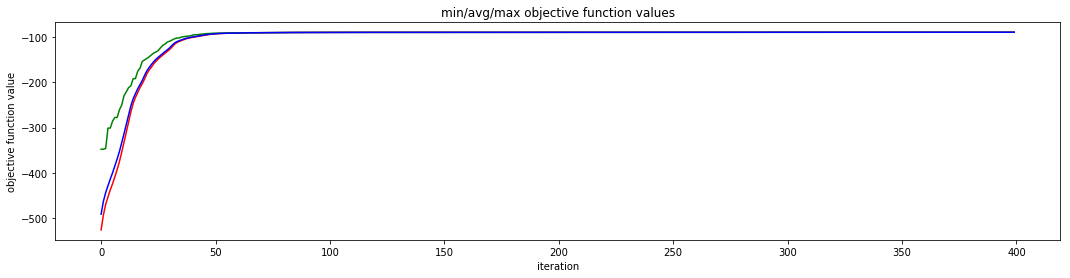

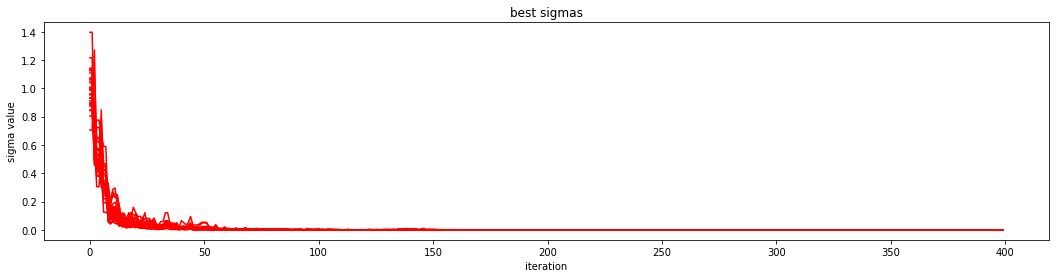

In [76]:
# Rastrigin, no crossover
#(dim, ppl_size, iter, )
parameters = [
    (30, 2000, 400),
    #(20, 2000, 150),
    #(50, 2000, 200),
    #(100, 3000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=1,
        sigma=1.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-5.12, 
        max_domain=5.12)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

(10, 2000, 50)
Iteration 0000 : best score = -1.44261117, mean score = -3.82525022.
Iteration 0020 : best score = -0.00004991, mean score = -0.00036148.
Iteration 0040 : best score = -0.00000000, mean score = -0.00000000.


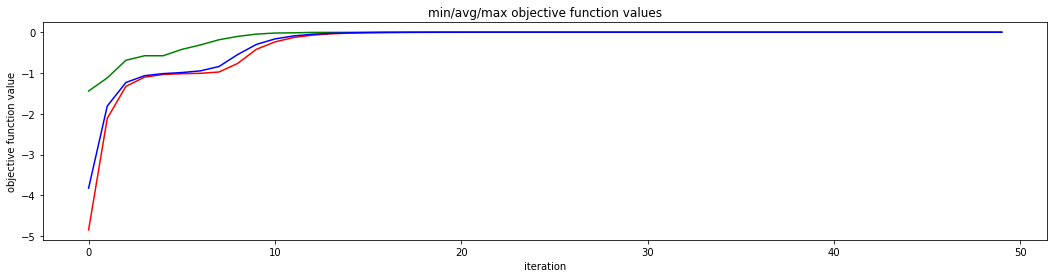

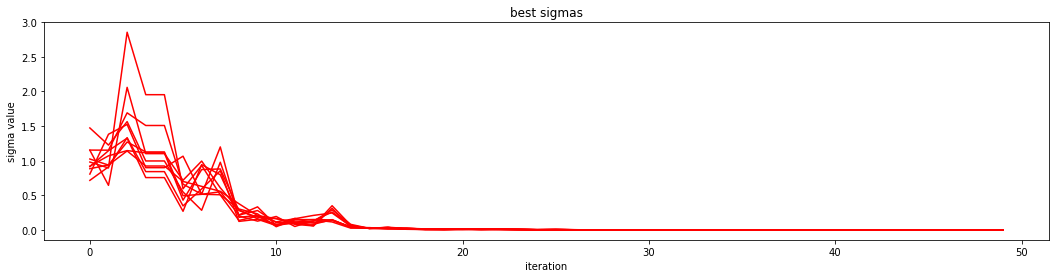

(20, 2000, 150)
Iteration 0000 : best score = -2.92128469, mean score = -7.25724964.
Iteration 0020 : best score = -0.00138611, mean score = -0.00386414.
Iteration 0040 : best score = -0.00000679, mean score = -0.00001388.
Iteration 0060 : best score = -0.00000003, mean score = -0.00000006.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0140 : best score = 0.00000000, mean score = 0.00000000.


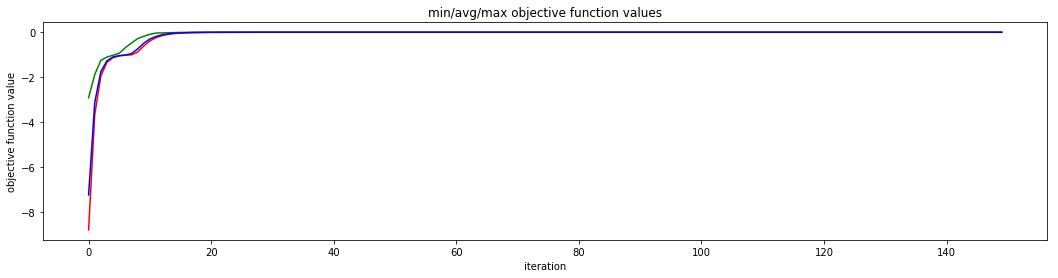

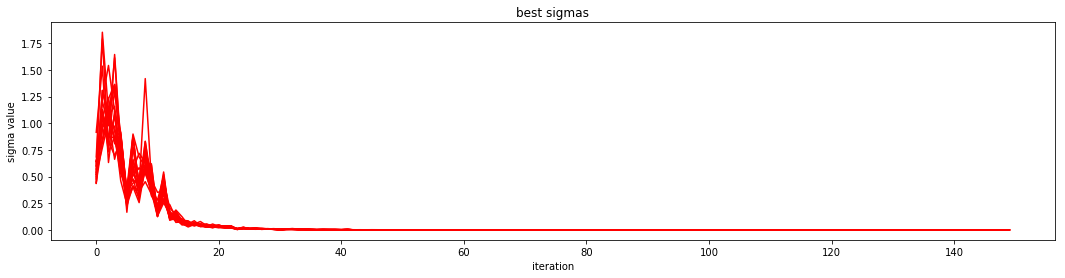

(50, 2000, 200)
Iteration 0000 : best score = -10.58855981, mean score = -18.52588531.
Iteration 0020 : best score = -0.15215204, mean score = -0.19252603.
Iteration 0040 : best score = -0.03197709, mean score = -0.03794991.
Iteration 0060 : best score = -0.00819879, mean score = -0.00972022.
Iteration 0080 : best score = -0.00216295, mean score = -0.00263005.
Iteration 0100 : best score = -0.00057420, mean score = -0.00073659.
Iteration 0120 : best score = -0.00016654, mean score = -0.00021078.
Iteration 0140 : best score = -0.00004377, mean score = -0.00005164.
Iteration 0160 : best score = -0.00000725, mean score = -0.00000903.
Iteration 0180 : best score = -0.00000109, mean score = -0.00000147.


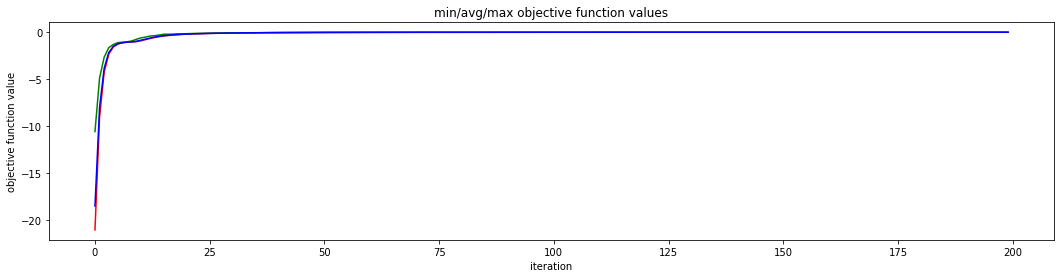

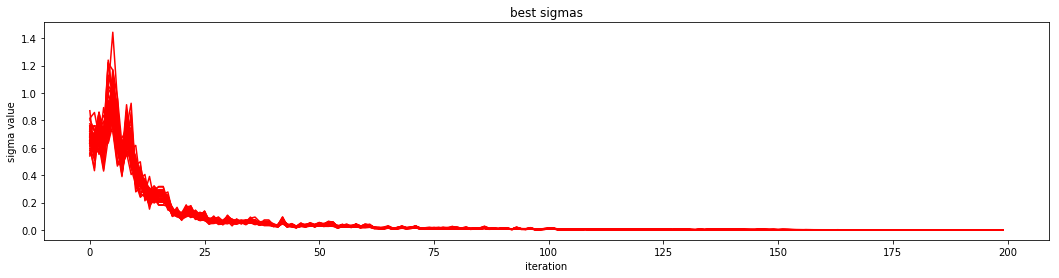

(100, 3000, 400)
Iteration 0000 : best score = -25.41666030, mean score = -38.00369085.
Iteration 0020 : best score = -0.27272371, mean score = -0.32597642.
Iteration 0040 : best score = -0.13257345, mean score = -0.14430857.
Iteration 0060 : best score = -0.07821508, mean score = -0.08383273.
Iteration 0080 : best score = -0.04787468, mean score = -0.05086824.
Iteration 0100 : best score = -0.02931174, mean score = -0.03188626.
Iteration 0120 : best score = -0.01867211, mean score = -0.01966007.
Iteration 0140 : best score = -0.01140096, mean score = -0.01221481.
Iteration 0160 : best score = -0.00656309, mean score = -0.00725277.
Iteration 0180 : best score = -0.00395662, mean score = -0.00417750.
Iteration 0200 : best score = -0.00223328, mean score = -0.00243911.
Iteration 0220 : best score = -0.00129430, mean score = -0.00140438.
Iteration 0240 : best score = -0.00067913, mean score = -0.00074519.
Iteration 0260 : best score = -0.00037188, mean score = -0.00040040.
Iteration 0280 

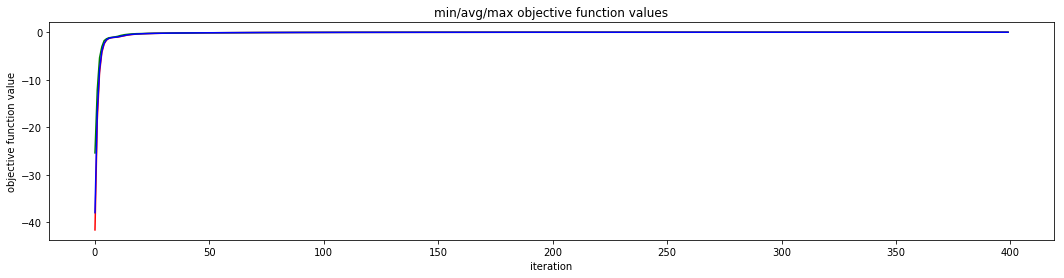

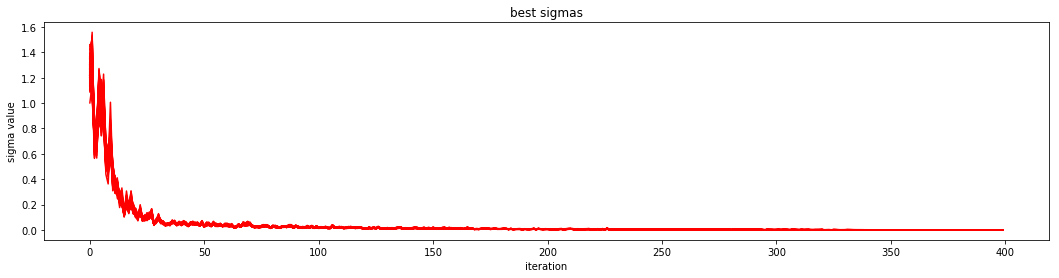

In [9]:
#(dim, ppl_size, iter, )
parameters = [
    (10, 2000, 50),
    (20, 2000, 150),
    (50, 2000, 200),
    (100, 3000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F8, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
        sigma=1.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-100.12, 
        max_domain=100.12)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefel F7

(10, 2000, 150)
Iteration 0000 : best score = -2167.15614343, mean score = -3624.90822934.
Iteration 0020 : best score = -2037.60137875, mean score = -3070.43433071.
Iteration 0040 : best score = -1411.76330137, mean score = -1526.63013618.
Iteration 0060 : best score = -1380.86807675, mean score = -1382.51145491.
Iteration 0080 : best score = -1204.99498087, mean score = -1209.72273339.
Iteration 0100 : best score = -1204.27340600, mean score = -1204.31362215.
Iteration 0120 : best score = -1204.26433882, mean score = -1204.26458465.
Iteration 0140 : best score = -1204.26429840, mean score = -1204.26429926.


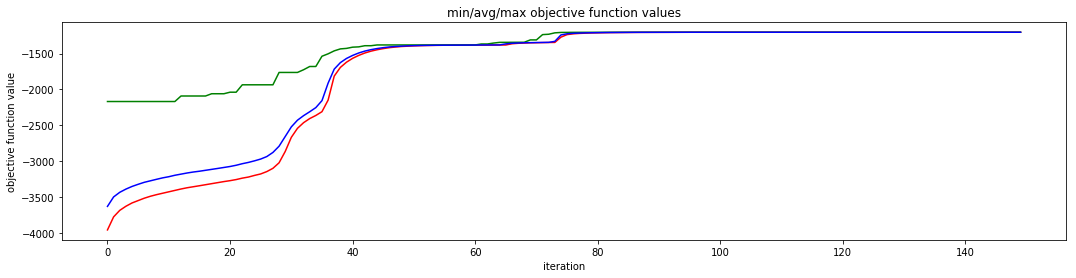

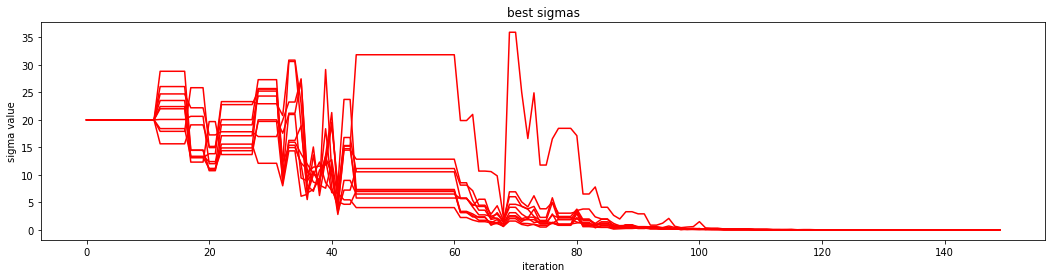

(20, 2500, 200)
Iteration 0000 : best score = -5607.11300989, mean score = -7581.41171279.
Iteration 0020 : best score = -5266.93148054, mean score = -6939.18519537.
Iteration 0040 : best score = -3385.70395044, mean score = -3676.60251430.
Iteration 0060 : best score = -3198.81330800, mean score = -3200.78751734.
Iteration 0080 : best score = -3198.06712578, mean score = -3198.07530230.
Iteration 0100 : best score = -3198.06397527, mean score = -3198.06400706.
Iteration 0120 : best score = -3198.06396218, mean score = -3198.06396230.
Iteration 0140 : best score = -3198.06396212, mean score = -3198.06396212.
Iteration 0160 : best score = -3198.06396212, mean score = -3198.06396212.
Iteration 0180 : best score = -3198.06396212, mean score = -3198.06396212.


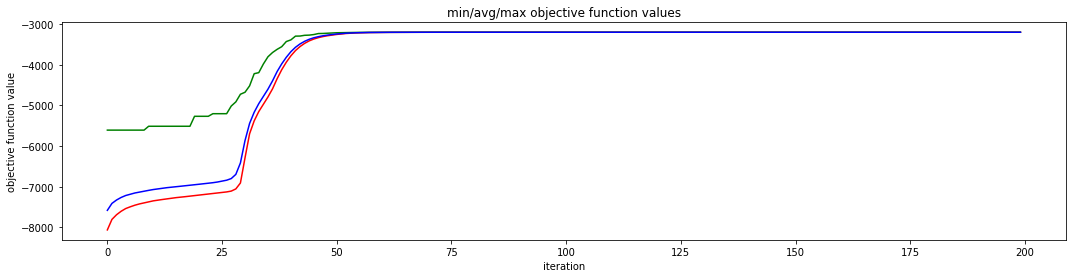

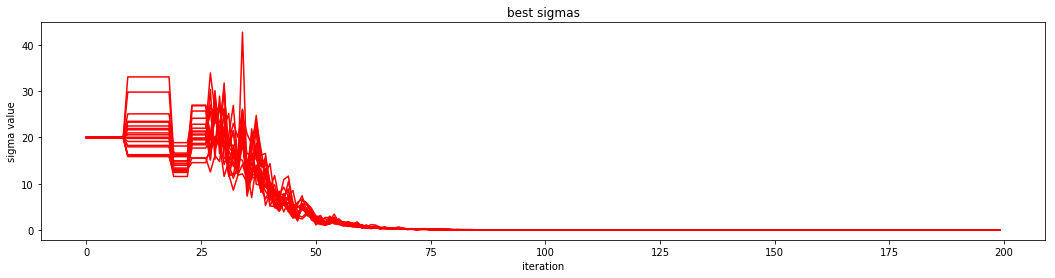

(50, 3500, 250)
Iteration 0000 : best score = -16235.37236973, mean score = -19672.63014694.
Iteration 0020 : best score = -16235.37236973, mean score = -18780.39274282.
Iteration 0040 : best score = -15451.27914285, mean score = -18570.35233932.
Iteration 0060 : best score = -10643.46816333, mean score = -11595.32253489.
Iteration 0080 : best score = -8564.12640288, mean score = -8662.16356856.
Iteration 0100 : best score = -8470.60557456, mean score = -8471.76232773.
Iteration 0120 : best score = -8469.30286025, mean score = -8469.31293833.
Iteration 0140 : best score = -8469.29340869, mean score = -8469.29349999.
Iteration 0160 : best score = -8469.29334515, mean score = -8469.29334580.
Iteration 0180 : best score = -8469.29334454, mean score = -8469.29334455.
Iteration 0200 : best score = -8469.29334454, mean score = -8469.29334454.
Iteration 0220 : best score = -8469.29334454, mean score = -8469.29334454.
Iteration 0240 : best score = -8469.29334454, mean score = -8469.29334454.


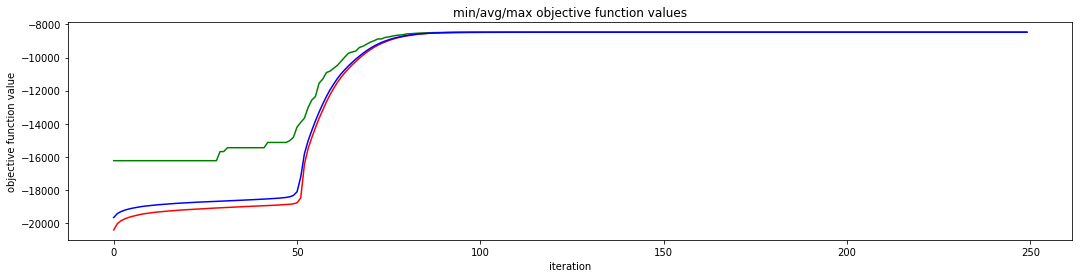

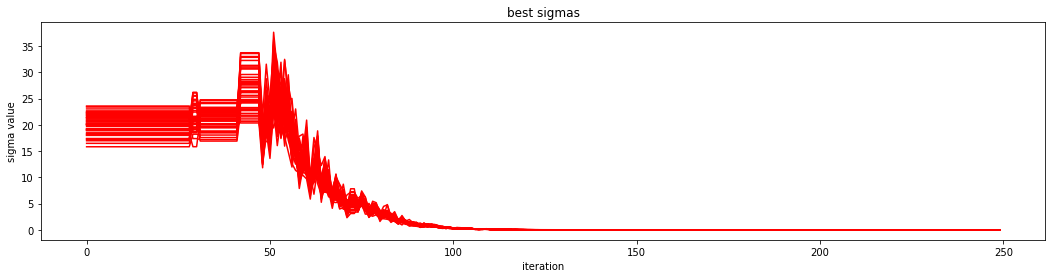

(100, 5000, 400)
Iteration 0000 : best score = -34914.77933516, mean score = -40087.05835320.
Iteration 0020 : best score = -34914.77933516, mean score = -38891.58390959.
Iteration 0040 : best score = -34914.77933516, mean score = -38632.12723192.
Iteration 0060 : best score = -31777.70374161, mean score = -33434.36214229.
Iteration 0080 : best score = -26379.41669918, mean score = -26696.72562656.
Iteration 0100 : best score = -25564.92170033, mean score = -25595.72972063.
Iteration 0120 : best score = -25450.94317309, mean score = -25457.18991631.
Iteration 0140 : best score = -25432.91558592, mean score = -25434.02745116.
Iteration 0160 : best score = -25428.91082490, mean score = -25429.03689720.
Iteration 0180 : best score = -25428.65394777, mean score = -25428.66184142.
Iteration 0200 : best score = -25428.63492181, mean score = -25428.63573323.
Iteration 0220 : best score = -25428.63303711, mean score = -25428.63310756.
Iteration 0240 : best score = -25428.63284477, mean score =

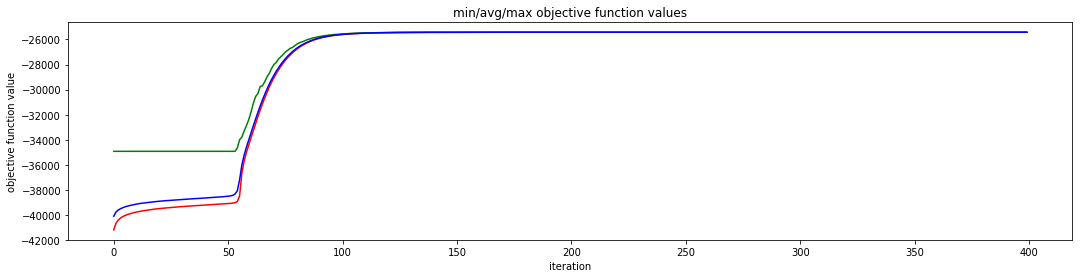

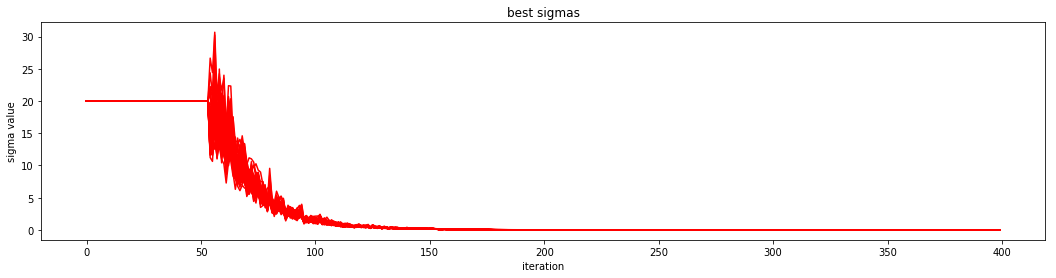

In [78]:
#(dim, ppl_size, iter, )
parameters = [
    (10, 2000, 150),
    (20, 2500, 200),
    (50, 3500, 250),
    (100, 5000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F7, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
        sigma=20.0, tau=1.0/np.sqrt(2*d), tau_0=0.5/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-500, 
        max_domain=500)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Zad3

(100, 2000, 200)
objective_function_F1a
Iteration 0000 : best score = -1.50541028, mean score = -2407.87981765.
Iteration 0020 : best score = -0.00001117, mean score = -0.01102194.
Iteration 0040 : best score = -0.00000639, mean score = -0.00297756.
Iteration 0060 : best score = -0.00000056, mean score = -0.00137704.
Iteration 0080 : best score = -0.00000056, mean score = -0.00080228.
Iteration 0100 : best score = -0.00000056, mean score = -0.00053072.
Iteration 0120 : best score = -0.00000056, mean score = -0.00038602.
Iteration 0140 : best score = -0.00000056, mean score = -0.00029354.
Iteration 0160 : best score = -0.00000044, mean score = -0.00022768.
Iteration 0180 : best score = -0.00000014, mean score = -0.00018042.


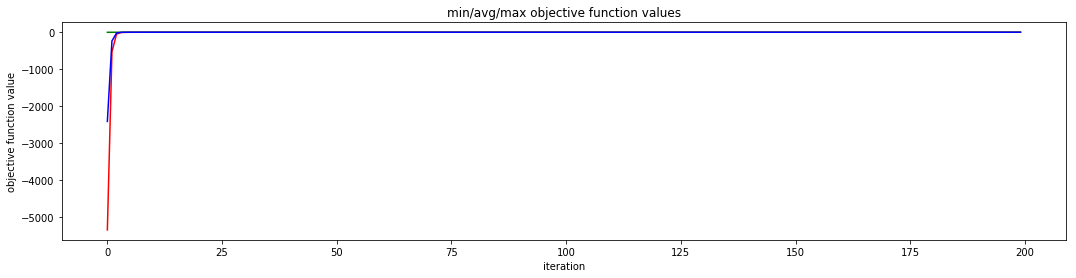

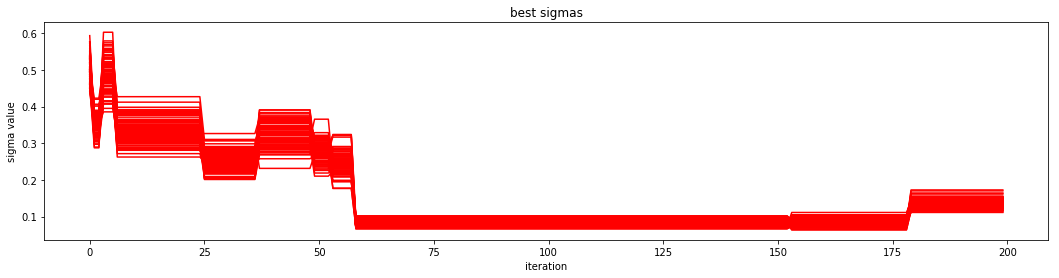

(100, 2000, 200)
objective_function_F1b
Iteration 0000 : best score = -15.31605003, mean score = -69498.96310684.
Iteration 0020 : best score = -0.00013509, mean score = -0.13432688.
Iteration 0040 : best score = -0.00002016, mean score = -0.03427333.
Iteration 0060 : best score = -0.00002016, mean score = -0.01543585.
Iteration 0080 : best score = -0.00001607, mean score = -0.00905318.
Iteration 0100 : best score = -0.00001522, mean score = -0.00591347.
Iteration 0120 : best score = -0.00001314, mean score = -0.00427446.
Iteration 0140 : best score = -0.00000822, mean score = -0.00317402.
Iteration 0160 : best score = -0.00000683, mean score = -0.00250651.
Iteration 0180 : best score = -0.00000279, mean score = -0.00206375.


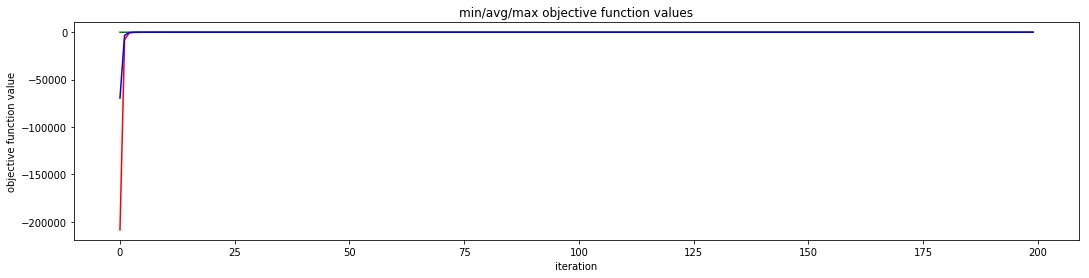

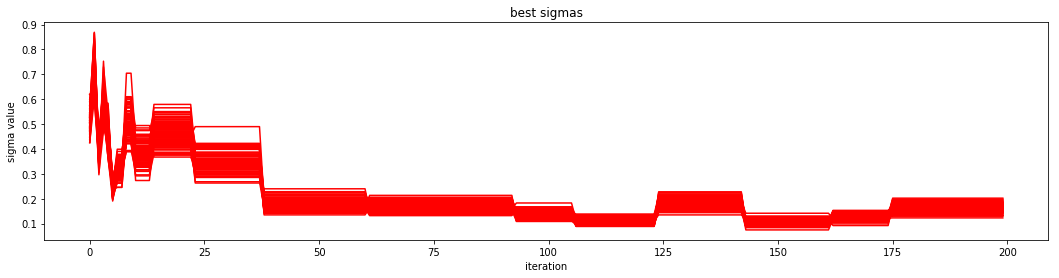

(100, 2000, 200)
objective_function_F1c
Iteration 0000 : best score = -0.21159581, mean score = -872.83295750.
Iteration 0020 : best score = -0.00000011, mean score = -0.00303386.
Iteration 0040 : best score = -0.00000011, mean score = -0.00087213.
Iteration 0060 : best score = -0.00000011, mean score = -0.00043005.
Iteration 0080 : best score = -0.00000011, mean score = -0.00025795.
Iteration 0100 : best score = -0.00000011, mean score = -0.00016737.
Iteration 0120 : best score = -0.00000011, mean score = -0.00011802.
Iteration 0140 : best score = -0.00000003, mean score = -0.00008482.
Iteration 0160 : best score = -0.00000003, mean score = -0.00006581.
Iteration 0180 : best score = -0.00000003, mean score = -0.00005287.


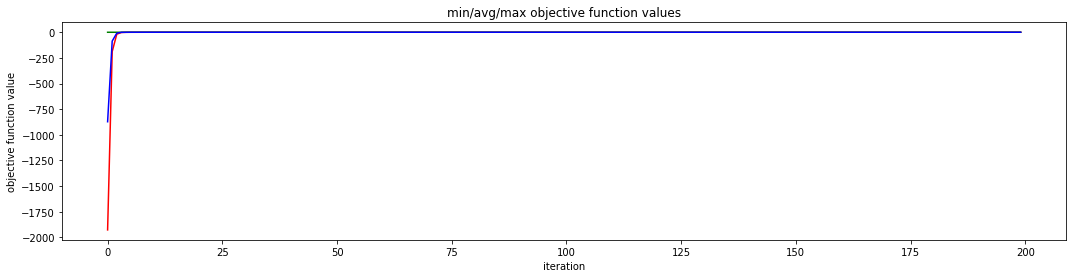

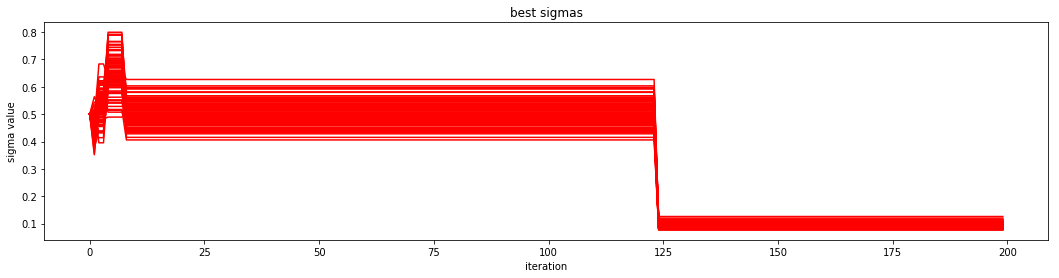

In [10]:
#(dim, ppl_size, iter, )
parameters = [
    #(10, 2000, 50),
    #(20, 2000, 150),
    #(50, 2000, 200),
    (100, 2000, 200),
]
for objective_function in [objective_function_F1a, objective_function_F1b, objective_function_F1c]:
    for d, N, T in parameters:
        print((d, N, T))
        print(objective_function.__name__)
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
            objective_function, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
            sigma=0.5, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-100, 
            max_domain=100)

        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-') # min
        plt.plot(history_objective_values[:, 1], 'g-') # max
        plt.plot(history_objective_values[:, 2], 'b-') # mean
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values')
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()

In [22]:
def es_cor_matrix(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1
      ,min_domain=-100, max_domain=100, mutation_type='simple'):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))
    diag_indices = np.arange(chromosome_length)
    
    # generating an initial population
    current_population_solutions = np.random.uniform(min_domain, max_domain, size=(population_size, chromosome_length))
    
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))
    #current_population_mats = sigma * np.random.randn(population_size, chromosome_length, chromosome_length)
    current_population_mats = sigma * np.ones((population_size, chromosome_length, chromosome_length))
    
    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):
        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        children_population_mats = np.zeros((number_of_offspring, chromosome_length, chromosome_length))
        
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)
            children_population_mats[i,:,:] = current_population_mats[parent_indices[i, :],:,:].mean(axis=0)
        
        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_mats = children_population_mats * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1, 1))
        
        if chromosome_length == 2:
            draw_population(objective_function, children_population_solutions, min_domain, max_domain)

        for i in range(number_of_offspring):
            if mutation_type=='orig':
                children_population_solutions[i, :] = children_population_solutions[i, :] + children_population_sigmas * np.random.randn(1, chromosome_length)
            elif mutation_type=='1':
                children_population_solutions[i, :] = children_population_solutions[i, :] + children_population_sigmas[0] * np.random.randn()
            elif mutation_type=='2':
                children_population_solutions[i, :] = children_population_solutions[i, :] + np.random.randn((chromosome_length))
            elif mutation_type=='3':
                A = children_population_mats[i]
                covariance_mat = np.dot(A, A.T)
                children_population_solutions[i, :] = children_population_solutions[i, :] + np.dot(np.random.randn(1, chromosome_length), np.linalg.cholesky(covariance_mat).T)
                
        # clip to domains
        children_population_solutions[children_population_solutions < min_domain] = min_domain
        children_population_solutions[children_population_solutions > max_domain] = max_domain
        
        if chromosome_length == 2:
            draw_population(objective_function, children_population_solutions, min_domain, max_domain)
            
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])
        current_population_mats = np.vstack([current_population_mats, children_population_mats])
        
        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]
        current_population_mats = current_population_mats[I[:population_size]]
    
    
        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [9]:
def draw_population(objective_function, population, min_domain, max_domain):
    domain_X = np.arange(min_domain, max_domain, 0.25)
    domain_Y = np.arange(min_domain, max_domain, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])



    plt.figure(figsize=(9, 9))
    plt.contour(X, Y, Z, 50)
    
    plt.plot(population[:, 0], population[:, 1], 'ro')
    plt.show()

(100, 2000, 100)
objective_function_F1a
Iteration 0000 : best score = -1.22081736, mean score = -2424.01751640.
Iteration 0010 : best score = -0.00002622, mean score = -0.02171174.
Iteration 0020 : best score = -0.00000244, mean score = -0.00344774.
Iteration 0030 : best score = -0.00000035, mean score = -0.00114953.
Iteration 0040 : best score = -0.00000002, mean score = -0.00051029.
Iteration 0050 : best score = -0.00000002, mean score = -0.00034806.
Iteration 0060 : best score = -0.00000002, mean score = -0.00024192.
Iteration 0070 : best score = -0.00000002, mean score = -0.00017507.
Iteration 0080 : best score = -0.00000002, mean score = -0.00013756.
Iteration 0090 : best score = -0.00000002, mean score = -0.00010562.


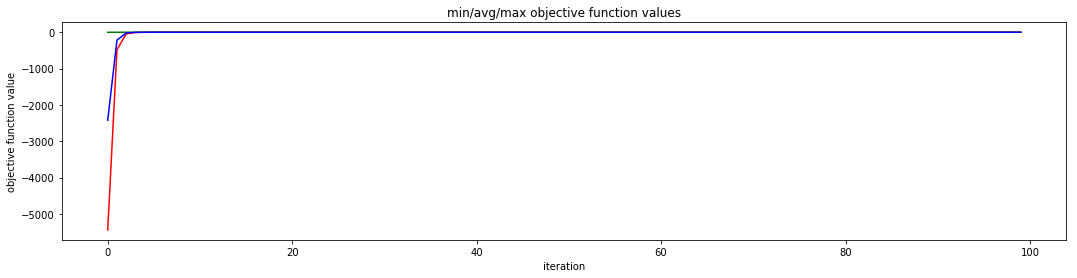

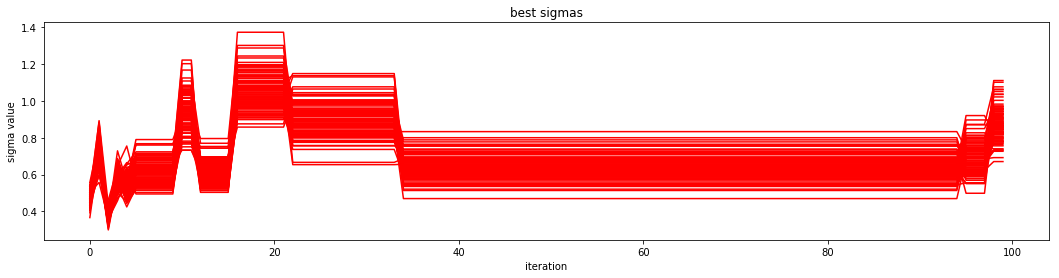

(100, 2000, 100)
objective_function_F1b
Iteration 0000 : best score = -11.72318506, mean score = -66070.29051737.
Iteration 0010 : best score = -0.00034713, mean score = -1.22843427.
Iteration 0020 : best score = -0.00011545, mean score = -0.15750175.
Iteration 0030 : best score = -0.00003604, mean score = -0.06605406.
Iteration 0040 : best score = -0.00002616, mean score = -0.03314277.
Iteration 0050 : best score = -0.00002616, mean score = -0.02314532.
Iteration 0060 : best score = -0.00002616, mean score = -0.01590751.
Iteration 0070 : best score = -0.00000206, mean score = -0.01177080.
Iteration 0080 : best score = -0.00000206, mean score = -0.00896976.
Iteration 0090 : best score = -0.00000206, mean score = -0.00683821.


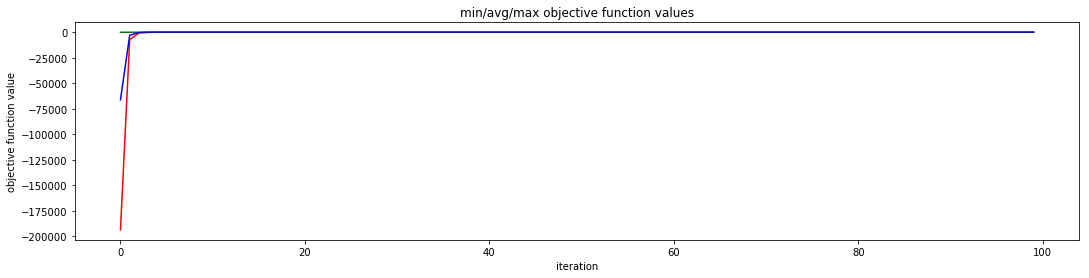

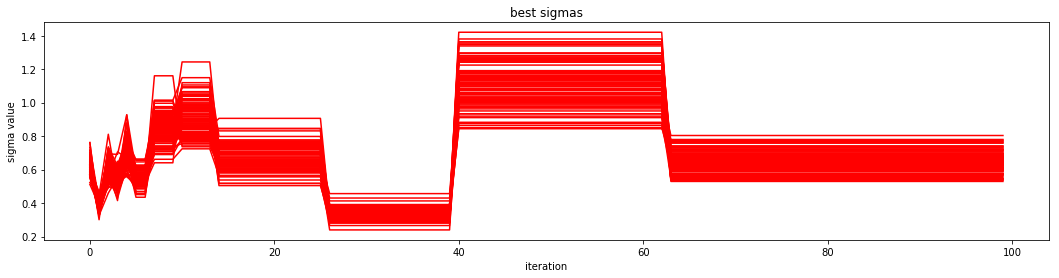

(100, 2000, 100)
objective_function_F1c
Iteration 0000 : best score = -0.09697920, mean score = -879.81795001.
Iteration 0010 : best score = -0.00000154, mean score = -0.00336183.
Iteration 0020 : best score = -0.00000013, mean score = -0.00048899.


In [ ]:
#(dim, ppl_size, iter, )
parameters = [
    #(10, 2000, 50),
    #(20, 1000, 200),
    #(50, 2000, 200),
    (100, 2000, 100),
]
for objective_function in [objective_function_F1a, objective_function_F1b, objective_function_F1c]:
    for d, N, T in parameters:
        print((d, N, T))
        print(objective_function.__name__)
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es_cor_matrix(
            objective_function, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
            sigma=0.5, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=10, min_domain=-100, 
            max_domain=100, mutation_type='1')

        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-') # min
        plt.plot(history_objective_values[:, 1], 'g-') # max
        plt.plot(history_objective_values[:, 2], 'b-') # mean
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values')
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()

(100, 2000, 100)
objective_function_F1a
Iteration 0000 : best score = -4.82106750, mean score = -2541.54937628.
Iteration 0010 : best score = -0.00000082, mean score = -0.00509609.
Iteration 0020 : best score = -0.00000073, mean score = -0.00033046.
Iteration 0030 : best score = -0.00000023, mean score = -0.00009043.
Iteration 0040 : best score = -0.00000009, mean score = -0.00003915.
Iteration 0050 : best score = -0.00000001, mean score = -0.00002130.
Iteration 0060 : best score = -0.00000000, mean score = -0.00001303.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000878.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000652.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000482.


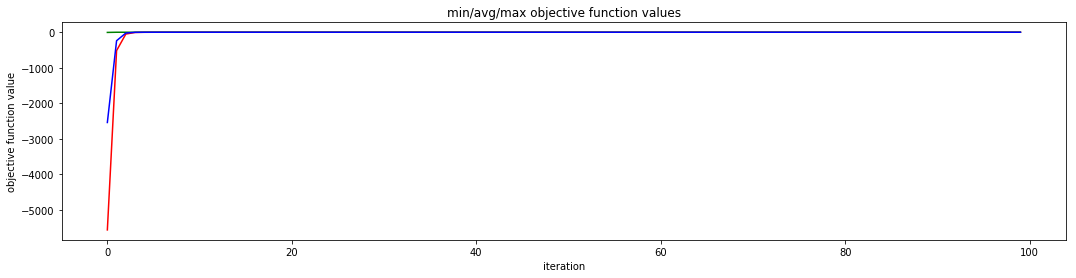

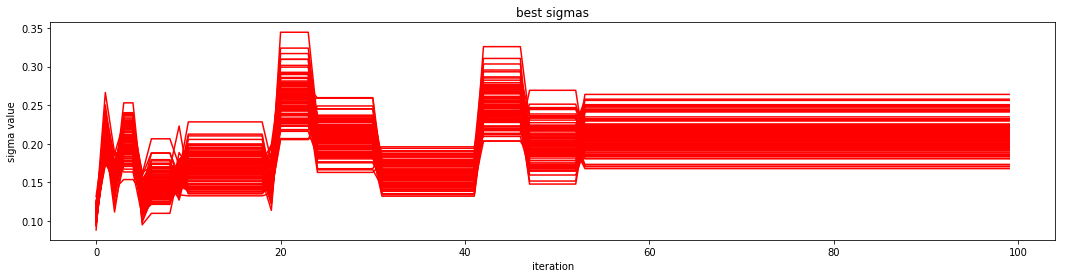

(100, 2000, 100)
objective_function_F1b
Iteration 0000 : best score = -16.55527797, mean score = -63867.39723790.
Iteration 0010 : best score = -0.00008253, mean score = -0.12206083.
Iteration 0020 : best score = -0.00001383, mean score = -0.00573660.
Iteration 0030 : best score = -0.00000002, mean score = -0.00141157.
Iteration 0040 : best score = -0.00000002, mean score = -0.00061212.
Iteration 0050 : best score = -0.00000002, mean score = -0.00033891.
Iteration 0060 : best score = -0.00000002, mean score = -0.00021374.
Iteration 0070 : best score = -0.00000002, mean score = -0.00014696.
Iteration 0080 : best score = -0.00000002, mean score = -0.00010968.
Iteration 0090 : best score = -0.00000002, mean score = -0.00008597.


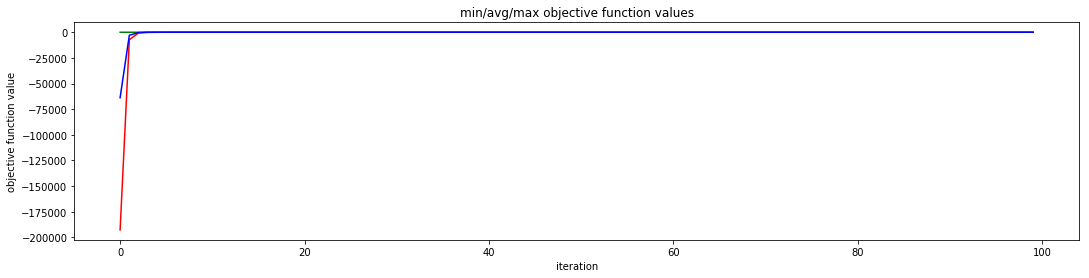

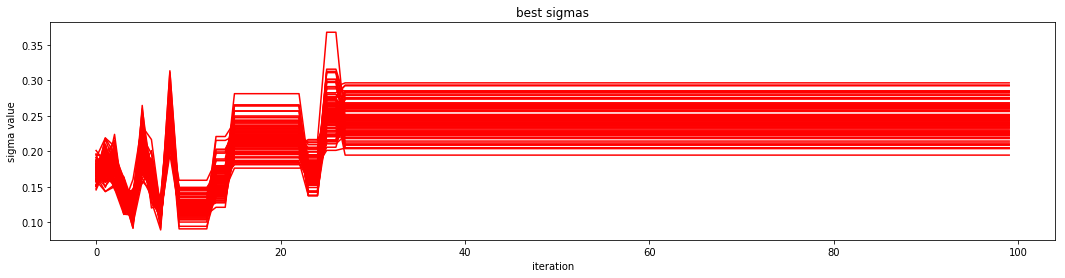

(100, 2000, 100)
objective_function_F1c
Iteration 0000 : best score = -0.77854804, mean score = -872.61716189.
Iteration 0010 : best score = -0.00000020, mean score = -0.00149323.
Iteration 0020 : best score = -0.00000000, mean score = -0.00009834.
Iteration 0030 : best score = -0.00000000, mean score = -0.00002538.
Iteration 0040 : best score = -0.00000000, mean score = -0.00001064.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000568.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000359.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000256.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000184.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000139.


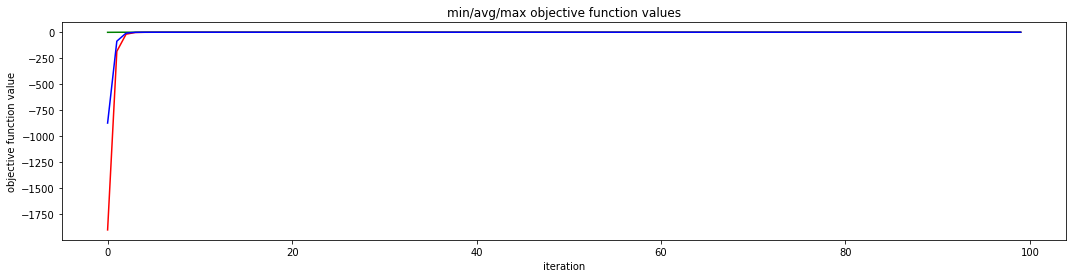

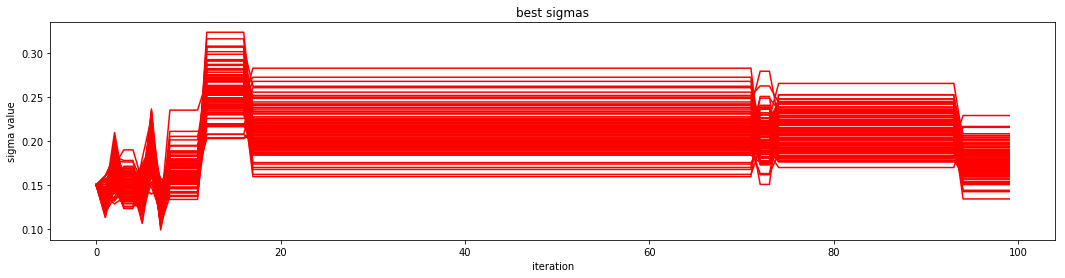

In [13]:
#(dim, ppl_size, iter, )
parameters = [
    #(10, 2000, 50),
    #(20, 1000, 100),
    #(50, 2000, 200),
    (100, 2000, 100),
]
for objective_function in [objective_function_F1a, objective_function_F1b, objective_function_F1c]:
    for d, N, T in parameters:
        print((d, N, T))
        print(objective_function.__name__)
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es_cor_matrix(
            objective_function, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
            sigma=0.15, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=10, min_domain=-100, 
            max_domain=100, mutation_type='3')

        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-') # min
        plt.plot(history_objective_values[:, 1], 'g-') # max
        plt.plot(history_objective_values[:, 2], 'b-') # mean
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values')
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()

## Schwefel

(10, 3000, 150)
Iteration 0000 : best score = -2107.98664161, mean score = -3607.68938265.
Iteration 0020 : best score = -5.42128994, mean score = -51.58783861.
Iteration 0040 : best score = -0.01163745, mean score = -0.05372063.
Iteration 0060 : best score = -0.00013476, mean score = -0.00020482.
Iteration 0080 : best score = -0.00012730, mean score = -0.00012739.
Iteration 0100 : best score = -0.00012728, mean score = -0.00012728.
Iteration 0120 : best score = -0.00012728, mean score = -0.00012728.
Iteration 0140 : best score = -0.00012728, mean score = -0.00012728.


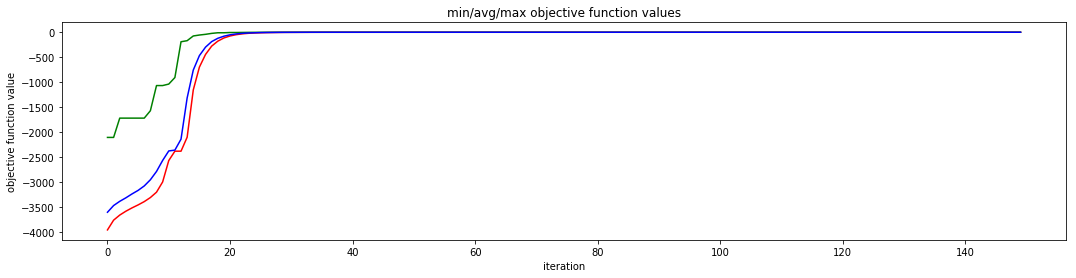

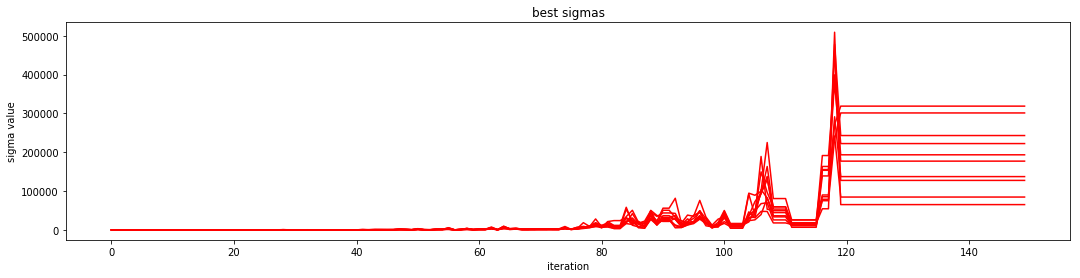

In [33]:
#(dim, ppl_size, iter, )
parameters = [
    (10, 3000, 150),
    #(20, 2500, 200),
    #(50, 3500, 250),
    #(100, 5000, 400),
]

for d, N, T in parameters:
    print((d, N, T))
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es_cor_matrix(
        objective_function_F7, d, N, number_of_iterations=T, number_of_offspring=2*N, number_of_parents=2,
        sigma=25.0, tau=1.0/np.sqrt(2*d), tau_0=1.0/np.sqrt(2*np.sqrt(d)), log_frequency=20, min_domain=-500, 
        max_domain=500, mutation_type='3')
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-') # min
    plt.plot(history_objective_values[:, 1], 'g-') # max
    plt.plot(history_objective_values[:, 2], 'b-') # mean
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()